## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of examining and summarizing a dataset to understand its main characteristics, detect patterns, spot anomalies, and formulate hypotheses using visual and statistical methods. Some of the key steps in EDA are:
1. Understanding the Data
2. Summarizing the Data
3. Handling Missing and Outlier Values
4. Visualizing Data
5. Feature Engineering & Transformation
6. Detecting Patterns & Insights

Importance of EDA are as follows:
1. Detects errors & missing values before modeling.
2. Provides insights that help shape feature selection.
3. Guides model selection and preprocessing strategies.
4. Enhances data understanding, leading to better decision-making.

In this notebook, we perform Exploratory Data Analysis(EDA) on flight delay data obtained from American Bureau of Transportation Statistics. This dataset contains information about on-time performance and delay statistics of flights in the US, spanning multiple years and divided by airport, carrier, and delay reason.

In [1]:
#import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

# Import the Kolmogorov-Smirnov Test from scipy.stats
from scipy.stats import kstest

In [2]:
#data location
column_definition_path="./Data/column_definitions.xlsx"
airline_data_path="./Data/DS_airline_delay_causes.csv"

#import data to dataframes
flight_data_df=pd.read_csv(airline_data_path)
column_definition_df=pd.read_excel(column_definition_path)

In [3]:
#displaying first five rows
print("Displaying first five rows of Flight data")
flight_data_df.head()

Displaying first five rows of Flight data


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2009,11,AS,Alaska Airlines Inc.,DCA,"Washington, DC: Ronald Reagan Washington National",88.0,11.0,1.99,0.00,...,0.00,0.0,0.0,266.0,65.0,0.0,201.0,0.0,0.0,NaN
1,2009,11,AS,Alaska Airlines Inc.,DEN,"Denver, CO: Denver International",123.0,5.0,3.47,0.00,...,0.00,0.0,0.0,81.0,57.0,0.0,24.0,0.0,0.0,NaN
2,2009,11,AS,Alaska Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",66.0,6.0,1.28,0.69,...,0.00,0.0,0.0,176.0,64.0,11.0,101.0,0.0,0.0,NaN
3,2009,11,AS,Alaska Airlines Inc.,EWR,"Newark, NJ: Newark Liberty International",59.0,10.0,0.24,0.00,...,0.56,0.0,0.0,553.0,8.0,0.0,526.0,0.0,19.0,NaN
4,2009,11,AS,Alaska Airlines Inc.,HNL,"Honolulu, HI: Daniel K Inouye International",85.0,18.0,1.34,1.46,...,0.00,0.0,0.0,547.0,85.0,89.0,373.0,0.0,0.0,NaN


In [4]:
print("Displaying first five rows of Column Definitions data")
column_definition_df.head(22)

Displaying first five rows of Column Definitions data


,Column,Description
0,year,Year
1,month,Month
2,carrier,Two character designator for the carrier
3,carrier_name,Full carrier name
4,airport,IATA airport code
5,airport_name,Full airport name
6,arr_flights,The total number of arriving flights for the c...
7,arr_del15,The number of arriving flights that were delay...
8,carrier_ct,The number of arriving flights delayed due to ...
9,weather_ct,The number of arriving flights delayed due to ...


So, based on the visualising the first 5 columnns of both the dataframes, we can observe that one dataframe contains the flight data and the other contains the column definitions. So, for more exploration we just consider the dataframe containing flight data.


In [5]:
#getting basic info of the flight data 
flight_data_df.info()

#getting count of number of features and number of data samples
Original_features=flight_data_df.shape[1]
Original_Columns= flight_data_df.shape[0]
print(f"Number of Features:{flight_data_df.shape[1]}")
print(f"Number of Data Samples:{flight_data_df.shape[0]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73282 entries, 0 to 73281
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 73282 non-null  int64  
 1    month               73282 non-null  int64  
 2   carrier              73282 non-null  object 
 3   carrier_name         73282 non-null  object 
 4   airport              73282 non-null  object 
 5   airport_name         73282 non-null  object 
 6   arr_flights          73240 non-null  float64
 7   arr_del15            73211 non-null  float64
 8   carrier_ct           73240 non-null  float64
 9    weather_ct          73240 non-null  float64
 10  nas_ct               73240 non-null  float64
 11  security_ct          73240 non-null  float64
 12  late_aircraft_ct     73240 non-null  float64
 13  arr_cancelled        73240 non-null  float64
 14  arr_diverted         73240 non-null  float64
 15   arr_delay           73240 non-null 

The total number of features in the dataset is 22 and the number of data samples is 73282 and the data types available in the dataset are: float64(16), int64(2), object(4).

Now, we search for missing values in the dataset.

In [6]:
# Count missing values per column
missing_values = flight_data_df.isnull().sum()

print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
year                       0
 month                     0
carrier                    0
carrier_name               0
airport                    0
airport_name               0
arr_flights               42
arr_del15                 71
carrier_ct                42
 weather_ct               42
nas_ct                    42
security_ct               42
late_aircraft_ct          42
arr_cancelled             42
arr_diverted              42
 arr_delay                42
 carrier_delay            42
weather_delay             42
nas_delay                 42
security_delay            42
late_aircraft_delay       42
Unnamed: 21            73282
dtype: int64


Based on the observation, it looks the colummn **Unnamed: 21** has null values equivalent to the size of the dataset. So this feature doesn't contain any crucial information and should be dropped. Whereas, 16/22(including Unnamed: 21) features have missing values. So the samples with missing values can be dropped as we have sufficient amount of data samples.

In [7]:
#Removing Unnamed: 21 feature
flight_data_df.drop('Unnamed: 21', axis=1, inplace=True)

#Removing Samples with missing values
flight_data_df.dropna(inplace=True)

#getting count of number of features and number of data samples after removing missing data samples and columns
print(f"Number of Features:{flight_data_df.shape[1]}")
print(f"Number of Data Samples:{flight_data_df.shape[0]}\n")

Features_aftermissing=flight_data_df.shape[1]
rows_aftermissing=flight_data_df.shape[0]
rows_removed_missing=Original_Columns-flight_data_df.shape[0]
features_removed= Original_features-flight_data_df.shape[1]
#Count of Columns and features removed
print(f"Number of Features Removed:{Original_features-flight_data_df.shape[1]}")
print(f"Number of Data Samples Removed:{Original_Columns-flight_data_df.shape[0]}")

#we observe space between some features, we remove them
flight_data_df.rename(columns=lambda x: x.lstrip() if x.startswith(' ') else x, inplace=True)

Number of Features:21
Number of Data Samples:73211

Number of Features Removed:1
Number of Data Samples Removed:71


So, finally the feature `Unnamed: 21` is dropped and the 71 rows with missing values are dropped. Now we try to find duplicate data samples.

In [8]:
#check for duplicate data samples
duplicates = flight_data_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}\n")

#dropping duplicate rows
flight_data_df.drop_duplicates(inplace=True)

Features_afterduplicates=flight_data_df.shape[1]
rows_afterduplicates=flight_data_df.shape[0]

#getting count of number of features and number of data samples after removing duplicate data samples
print(f"Number of Features:{flight_data_df.shape[1]}")
print(f"Number of Data Samples:{flight_data_df.shape[0]}\n")


Number of duplicate rows: 0

Number of Features:21
Number of Data Samples:73211



Now, we visualise the data and features using Pie Chart. As 71 rows were removed and 0 data samples were found to be duplicate. So 0.1% of the Original dataset was removed and 95.5% of the features remain as they all contain important information.

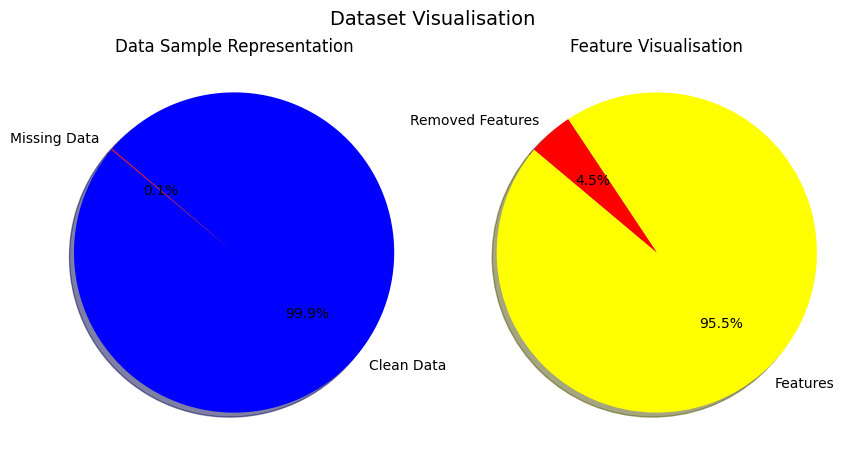

In [9]:
total_samples=73282
# Data to plot
labels_1 = ['Clean Data', 'Missing Data']
sizes_1 = [rows_afterduplicates,  rows_removed_missing]  # Percentages or values
colors_1 = ['Blue', 'Red']

# Data to plot
labels_2 = ['Features', 'Removed Features']
sizes_2 = [Features_afterduplicates,  features_removed]  # Percentages or values
colors_2 = ['Yellow', 'Red']

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Dataset Visualisation', fontsize=14)

axes[0].pie(sizes_1, labels=labels_1, colors=colors_1, autopct='%1.1f%%', shadow=True, startangle=140)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title('Data Sample Representation')

axes[1].pie(sizes_2, labels=labels_2, colors=colors_2, autopct='%1.1f%%', shadow=True, startangle=140)
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[1].set_title('Feature Visualisation')

plt.tight_layout
plt.show()

In [10]:
#getting summary of numerical columns
flight_data_df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000
mean,2011.188483,6.576894,994.259606,191.557594,46.935397,6.170249,74.565059,0.430687,63.456257,18.667072,2.306252,11339.752879,3060.529715,528.189234,3593.917909,17.302181,4139.806887
std,5.081828,3.446720,1855.244965,362.768908,80.798703,16.566612,162.986690,1.406470,135.453333,69.366322,7.277573,23124.803113,6160.159482,1505.819654,9062.820901,63.395679,8987.968516
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2007.000000,4.000000,124.000000,24.000000,7.520000,0.000000,7.750000,0.000000,4.360000,0.000000,0.000000,1218.000000,375.000000,0.000000,289.000000,0.000000,247.000000
50%,2011.000000,7.000000,331.000000,68.000000,19.930000,1.400000,23.900000,0.000000,15.760000,3.000000,0.000000,3582.000000,1080.000000,91.000000,952.000000,0.000000,997.000000
75%,2016.000000,10.000000,867.000000,175.000000,48.420000,5.400000,66.060000,0.090000,51.335000,12.000000,2.000000,9932.000000,2837.000000,425.000000,2880.000000,4.000000,3431.000000
max,2020.000000,12.000000,21977.000000,6377.000000,1792.070000,641.540000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3194.000000,148181.000000


Some observations from the numerical data(Including both integer and float) from above:
1. Columns "nas_ct"(The number of arriving flights delayed due to national air system issues) and "nas_delay"(The total number of delay minutes due to  national air system issues) has negative minimum value, which seems suspicious this could be due to the following reasons:
    * Data Processing or Reporting Errors.
    * Adjustments or Corrections in Delay Calculations.
    * Negative Values Due to Rescheduling
    * Incorrect Data Transformation
    we correct this error by replacing them with 0.
2. The delayed flights features have exceptionally high standard deviation, which indicates skewed distribution, caused by certain special circumstances(can be visualised by the maximum value). Similar behaviour shown by "arr_cancelled" feature.

We fix features `nas_ct` and `nas_delay` in the handing the skewness section.


In [11]:
# # Replace negative values in nas_ct and nas_delay with 0
# flight_data_df["nas_ct"] = flight_data_df["nas_ct"].apply(lambda x: max(x, 0))
# flight_data_df["nas_delay"] = flight_data_df["nas_delay"].apply(lambda x: max(x, 0))

# # Verify if any negative values remain
# negative_values_check = flight_data_df[(flight_data_df["nas_ct"] < 0) | (flight_data_df["nas_delay"] < 0)]

# # Display confirmation message
# negative_values_check.shape[0]

We now check if there are any negative values.

In [12]:
#check again the summary
flight_data_df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000
mean,2011.188483,6.576894,994.259606,191.557594,46.935397,6.170249,74.565059,0.430687,63.456257,18.667072,2.306252,11339.752879,3060.529715,528.189234,3593.917909,17.302181,4139.806887
std,5.081828,3.446720,1855.244965,362.768908,80.798703,16.566612,162.986690,1.406470,135.453333,69.366322,7.277573,23124.803113,6160.159482,1505.819654,9062.820901,63.395679,8987.968516
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2007.000000,4.000000,124.000000,24.000000,7.520000,0.000000,7.750000,0.000000,4.360000,0.000000,0.000000,1218.000000,375.000000,0.000000,289.000000,0.000000,247.000000
50%,2011.000000,7.000000,331.000000,68.000000,19.930000,1.400000,23.900000,0.000000,15.760000,3.000000,0.000000,3582.000000,1080.000000,91.000000,952.000000,0.000000,997.000000
75%,2016.000000,10.000000,867.000000,175.000000,48.420000,5.400000,66.060000,0.090000,51.335000,12.000000,2.000000,9932.000000,2837.000000,425.000000,2880.000000,4.000000,3431.000000
max,2020.000000,12.000000,21977.000000,6377.000000,1792.070000,641.540000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3194.000000,148181.000000


Works!

Now we visualise the categorical columns. And observe a discrepancy as number of carrier and carrier_names are not equal. We will fix it later.

In [13]:
#getting summary of categorical columns
flight_data_df.describe(include="object")

,carrier,carrier_name,airport,airport_name
count,73211,73211,73211,73211
unique,28,32,30,30
top,DL,Delta Air Lines Inc.,DTW,"Detroit, MI: Detroit Metro Wayne County"
freq,6289,6289,2806,2806


There are 4 categorical features. Now, we visualise the summary of the above in a graphical format.

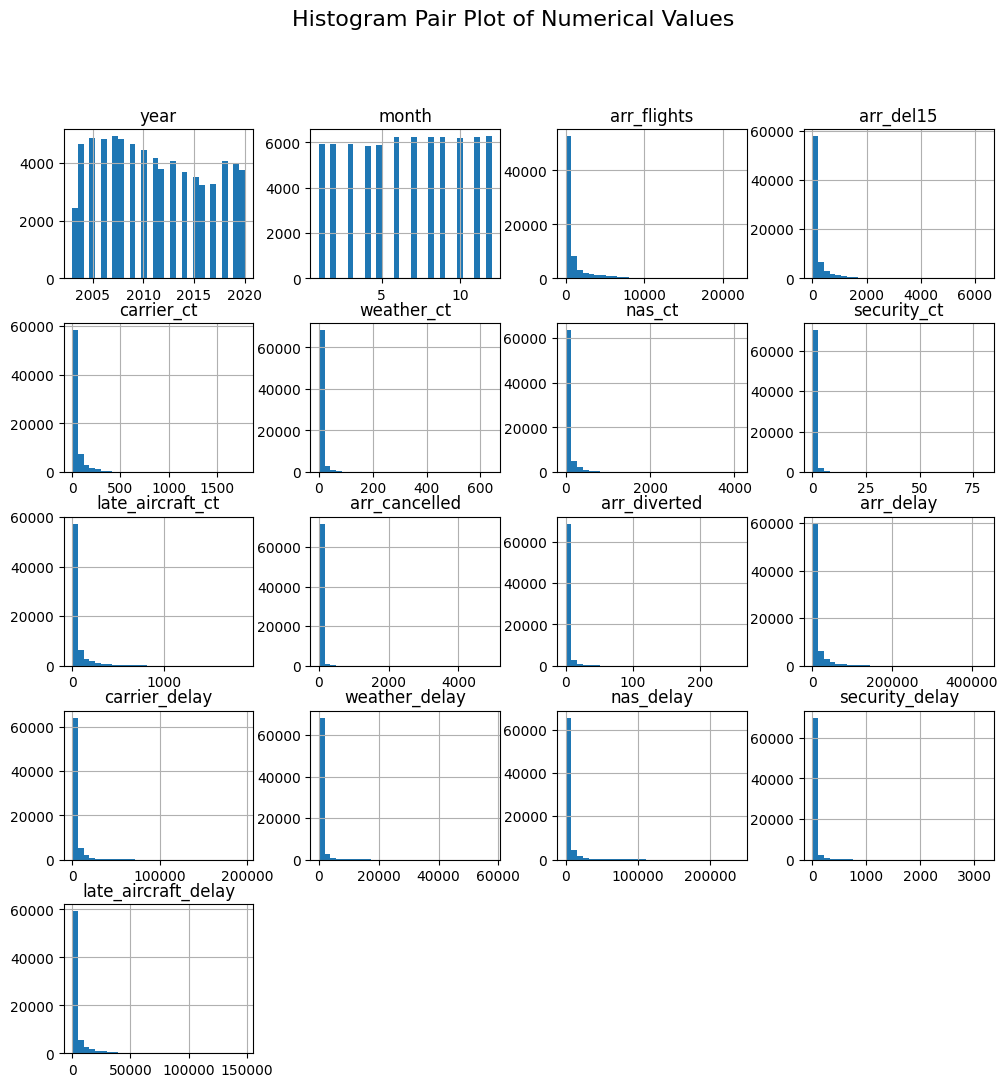

In [14]:
#Analysing numerical values and visulising outliers
flight_data_df.hist(figsize=(12, 12), bins=30)
plt.suptitle("Histogram Pair Plot of Numerical Values",fontsize=16)
plt.show()

This is a histogram matrix (pair plot) for numerical variables in the airline delay dataset. Each subplot represents the distribution of a specific numeric variable, providing insights into the spread and skewness of the data. Following are some of the observations from the graph above:

1. **Time-Based Variables (Year, Month)**:
    * "Year" Histogram: Shows the distribution of flight records over different years.The number of records fluctuates over time, with a noticeable drop in recent years.
    * "Month" Histogram: Displays a fairly uniform distribution, indicating that flight records are evenly spread across all months.

2. **Flight Operations Variables (arr_flights, arr_del15, arr_cancelled, arr_diverted)**:

    * "arr_flights" (Total Arriving Flights): Right-skewed, meaning most airports have relatively few flights, while a few have very high traffic.
    * "arr_del15" (Delayed Flights ≥ 15 mins): Also right-skewed, indicating that most records have fewer delays, but a few have a very high number.
    * "arr_cancelled" & "arr_diverted" (Cancellations & Diversions): Majority of the records have very low values (close to 0), but some outliers exist with significantly high cancellations or diversions.

3. **Delay Cause Variables (carrier_ct, weather_ct, nas_ct, security_ct, late_aircraft_ct)**: All show right-skewed distributions as most flights have minimal delay occurrences. A few flights have very high delays, appearing as outliers.

4. **Delay Duration Variables (arr_delay, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay)**:Extremely right-skewed distributions.
This suggests that while most flights experience small delays, some flights have massive delays, creating long tails in the distributions.

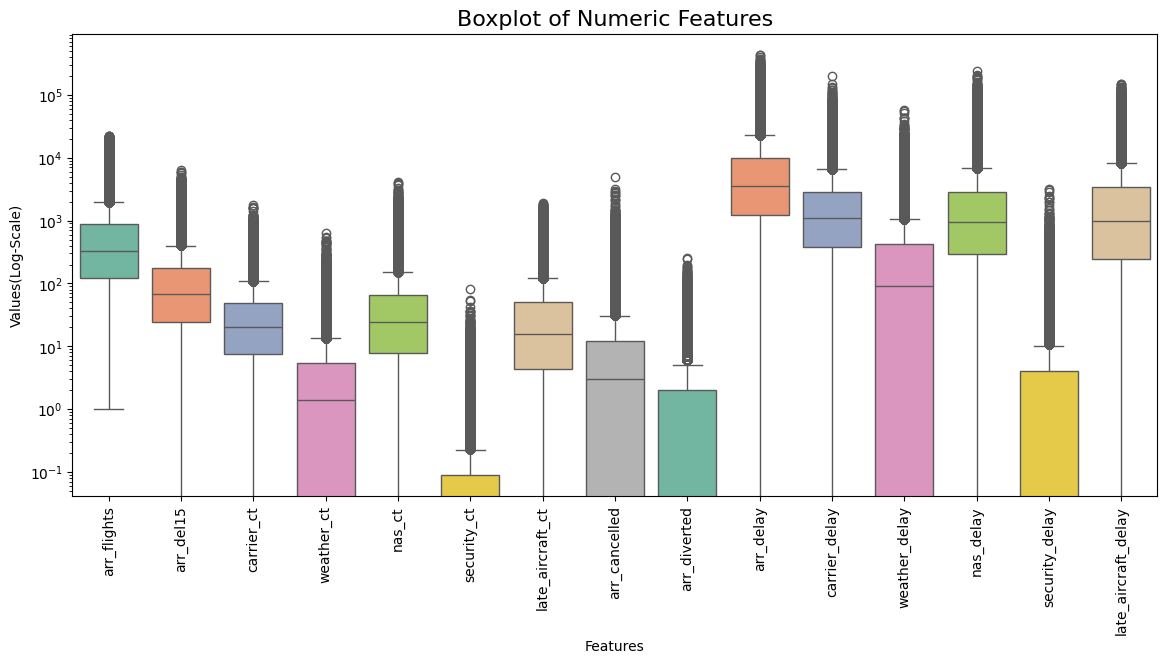

In [15]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=flight_data_df.select_dtypes(include=['float64']),palette="Set2", showfliers=True)
plt.xticks(rotation=90)
plt.yscale("log") 
plt.ylabel("Values(Log-Scale)")
plt.xlabel("Features")
plt.title("Boxplot of Numeric Features", fontsize=16)
plt.show()


This is a box plot visualization of float flight delay-related features(the grey circles represents outlier), with values represented on a logarithmic scale. Some of the observations are as follows:

1. Flight Operations (arr_flights, arr_del15, arr_cancelled, arr_diverted):
    a. arr_flights (Total Arrival Flights) has a wide spread, meaning the number of arriving flights varies significantly across airports and carriers.
    b. arr_del15 (Delayed Flights ≥ 15 mins) shows some outliers, but the spread is more contained than total arrivals.
    c. arr_cancelled and arr_diverted have many extreme outliers, showing that flight cancellations and diversions are rare but sometimes extreme.

2. Delay Causes (carrier_ct, weather_ct, nas_ct, security_ct, late_aircraft_ct):
    a. All delay causes are right-skewed, meaning most flights experience minimal delays, but a few flights have very high delays.
    b. Security delays (security_ct) are the smallest in scale, indicating they contribute the least to total delays.

3. Total Delay Duration (arr_delay, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay):
    a. arr_delay (Total Arrival Delay) has significant outliers, meaning a few flights experience massive delays.
    b. weather_delay is highly skewed, showing that while most weather-related delays are small, some are extreme.
    c. late_aircraft_delay and carrier_delay have a large spread, suggesting these are major contributors to flight delays.

Though we observe large number of outliers, but they remain in the data as they seem quite possible in the aviation industry. And we use transformations to deal with the positively skewed data towards the end of the data analysis.


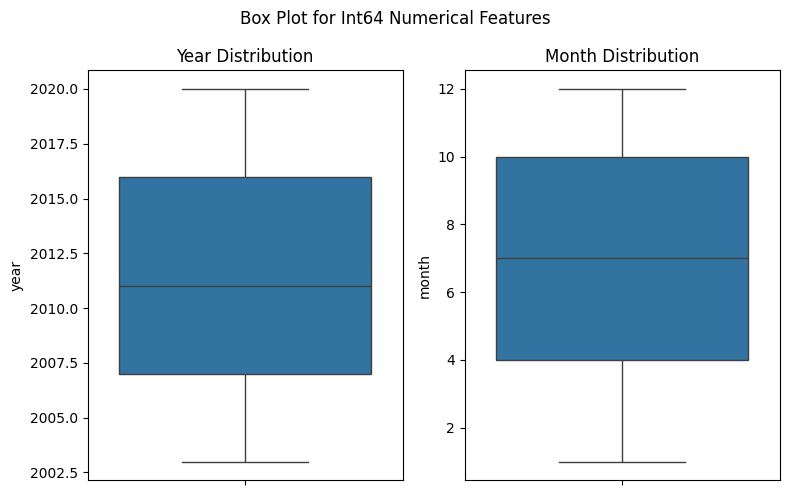

In [16]:
#we are aware int64 has only two features year and 
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
fig.suptitle("Box Plot for Int64 Numerical Features")

# First boxplot for 'year'
sns.boxplot(data=flight_data_df['year'], ax=axes[0])
axes[0].set_title('Year Distribution')

# Second boxplot for 'month'
sns.boxplot(data=flight_data_df['month'], ax=axes[1])
axes[1].set_title('Month Distribution')

# Adjust layout and display
plt.tight_layout()
plt.show()

We now analysis the int64 datatype which are represented by two features year and month. Features are as follows:
1. Year: The dataset spans from 2003 to 2020. The median year is around 2010-2011, meaning half of the records are before this and half are after. The data is evenly distributed across the years, as indicated by the symmetrical box.
2. Month: The dataset covers all 12 months of the year. The median month is around July, meaning half of the records are before July and half are after.The data appears evenly spread across all months, as indicated by the symmetrical box.

Now we analyse the categorical features.

In [17]:
# Count unique values in each categorical column
flight_data_df.select_dtypes(include=['object']).nunique()

carrier         28
carrier_name    32
airport         30
airport_name    30
dtype: int64

In [18]:
#mapping aiport to airport_name
airport_name_mapping = flight_data_df.groupby('airport')['airport_name'].unique().reset_index()
print(airport_name_mapping)

   airport                                       airport_name
0      ATL  [Atlanta, GA: Hartsfield-Jackson Atlanta Inter...
1      BOS                  [Boston, MA: Logan International]
2      BWI  [Baltimore, MD: Baltimore/Washington Internati...
3      CLT   [Charlotte, NC: Charlotte Douglas International]
4      DCA  [Washington, DC: Ronald Reagan Washington Nati...
5      DEN                 [Denver, CO: Denver International]
6      DFW  [Dallas/Fort Worth, TX: Dallas/Fort Worth Inte...
7      DTW          [Detroit, MI: Detroit Metro Wayne County]
8      EWR         [Newark, NJ: Newark Liberty International]
9      FLL  [Fort Lauderdale, FL: Fort Lauderdale-Hollywoo...
10     HNL      [Honolulu, HI: Daniel K Inouye International]
11     IAD  [Washington, DC: Washington Dulles International]
12     IAH  [Houston, TX: George Bush Intercontinental/Hou...
13     JFK      [New York, NY: John F. Kennedy International]
14     LAS            [Las Vegas, NV: McCarran International]
15     L

We observe that the feature `carrier` and `carrier_name` should have same number of unique categories.Lets investigate this.

In [19]:
carrier_name_mapping = flight_data_df.groupby('carrier')['carrier_name'].unique().reset_index()
print(carrier_name_mapping)

   carrier                                       carrier_name
0       9E        [Pinnacle Airlines Inc., Endeavor Air Inc.]
1       AA                           [American Airlines Inc.]
2       AQ                              [Aloha Airlines Inc.]
3       AS                             [Alaska Airlines Inc.]
4       B6                                  [JetBlue Airways]
5       CO                       [Continental Air Lines Inc.]
6       DH        [Atlantic Coast Airlines, Independence Air]
7       DL                             [Delta Air Lines Inc.]
8       EV  [Atlantic Southeast Airlines, ExpressJet Airli...
9       F9                           [Frontier Airlines Inc.]
10      FL                      [AirTran Airways Corporation]
11      G4                                    [Allegiant Air]
12      HA                           [Hawaiian Airlines Inc.]
13      HP                       [America West Airlines Inc.]
14      MQ          [American Eagle Airlines Inc., Envoy Air]
15      

We observe the following:
* carrier `9E` belongs Pinnacle Airlines Inc. but was rebranded as Endeavor Air Inc. 
* `MQ` was American Eagle Airlines Inc., which later rebranded as Envoy Air. 
* `EV` represents both Atlantic Southeast Airlines and ExpressJet Airlines, which were merged but continued using the same carrier code.
* `DH` was initially Atlantic Coast Airlines, which rebranded as Independence Air before ceasing operations.
* `OH` represents both Comair Inc. and PSA Airlines Inc., as PSA Airlines may have taken over operations from Comair.

We aim to standardise the naming to avoid redundancy of data and create a standardisation function through which we update the update the `carrier_name` based on the last update.


In [20]:
# Sorting the dataset by year to ensure the latest carrier name is selected
df_sorted = flight_data_df.sort_values(by='year', ascending=True)

# Creating a mapping of carrier codes to their most recent carrier name
carrier_standardized_mapping = df_sorted.groupby('carrier')['carrier_name'].last().to_dict()

# Apply the mapping to the dataset to standardize the carrier names
flight_data_df['carrier_name'] = flight_data_df['carrier'].map(carrier_standardized_mapping)

In [21]:
#now we check if the error is resolve
# Count unique values in each categorical column
flight_data_df.select_dtypes(include=['object']).nunique()

carrier         28
carrier_name    27
airport         30
airport_name    30
dtype: int64

Still we notice, that the values are not same. Lets map them again.

In [22]:
carrier_name_mapping = flight_data_df.groupby('carrier')['carrier_name'].unique().reset_index()
print(carrier_name_mapping)

   carrier                   carrier_name
0       9E            [Endeavor Air Inc.]
1       AA       [American Airlines Inc.]
2       AQ          [Aloha Airlines Inc.]
3       AS         [Alaska Airlines Inc.]
4       B6              [JetBlue Airways]
5       CO   [Continental Air Lines Inc.]
6       DH             [Independence Air]
7       DL         [Delta Air Lines Inc.]
8       EV      [ExpressJet Airlines LLC]
9       F9       [Frontier Airlines Inc.]
10      FL  [AirTran Airways Corporation]
11      G4                [Allegiant Air]
12      HA       [Hawaiian Airlines Inc.]
13      HP   [America West Airlines Inc.]
14      MQ                    [Envoy Air]
15      NK             [Spirit Air Lines]
16      NW      [Northwest Airlines Inc.]
17      OH            [PSA Airlines Inc.]
18      OO        [SkyWest Airlines Inc.]
19      RU     [ExpressJet Airlines Inc.]
20      TZ       [ATA Airlines d/b/a ATA]
21      UA        [United Air Lines Inc.]
22      US              [US Airway

We notice that ExpressJet Airlines Inc. has two carrier code "XE" and "RU". ExpressJet historically had two carrier codes because it operated under different identities at various points in its history, sometimes operating as a separate entity and sometimes as a subsidiary of another airline, leading to the use of different codes depending on the operating arrangement at the time. To avoid confusion, we rename the carrier_name to include code to avoid loss of data.

In [23]:
# Identifying which carrier codes map to "ExpressJet Airlines Inc."
expressjet_carriers = flight_data_df[flight_data_df['carrier_name'] == "ExpressJet Airlines Inc."]['carrier'].unique()

# Updating carrier names to ensure uniqueness by appending carrier codes
for carrier in expressjet_carriers:
    flight_data_df.loc[flight_data_df['carrier'] == carrier, 'carrier_name'] = f"ExpressJet Airlines Inc. ({carrier})"

#now we check if the error is resolve
# Count unique values in each categorical column
flight_data_df.select_dtypes(include=['object']).nunique()

carrier         28
carrier_name    28
airport         30
airport_name    30
dtype: int64

Now it seems balanced and we check the final mapping.

In [24]:
#checking the final mapping
carrier_name_mapping = flight_data_df.groupby('carrier')['carrier_name'].unique().reset_index()
print(carrier_name_mapping)

   carrier                     carrier_name
0       9E              [Endeavor Air Inc.]
1       AA         [American Airlines Inc.]
2       AQ            [Aloha Airlines Inc.]
3       AS           [Alaska Airlines Inc.]
4       B6                [JetBlue Airways]
5       CO     [Continental Air Lines Inc.]
6       DH               [Independence Air]
7       DL           [Delta Air Lines Inc.]
8       EV        [ExpressJet Airlines LLC]
9       F9         [Frontier Airlines Inc.]
10      FL    [AirTran Airways Corporation]
11      G4                  [Allegiant Air]
12      HA         [Hawaiian Airlines Inc.]
13      HP     [America West Airlines Inc.]
14      MQ                      [Envoy Air]
15      NK               [Spirit Air Lines]
16      NW        [Northwest Airlines Inc.]
17      OH              [PSA Airlines Inc.]
18      OO          [SkyWest Airlines Inc.]
19      RU  [ExpressJet Airlines Inc. (RU)]
20      TZ         [ATA Airlines d/b/a ATA]
21      UA          [United Air 

/tmp/ipykernel_208002/2217488979.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(carrier_counts['label'],rotation=90)
/tmp/ipykernel_208002/2217488979.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(airport_counts['label'],rotation=90)


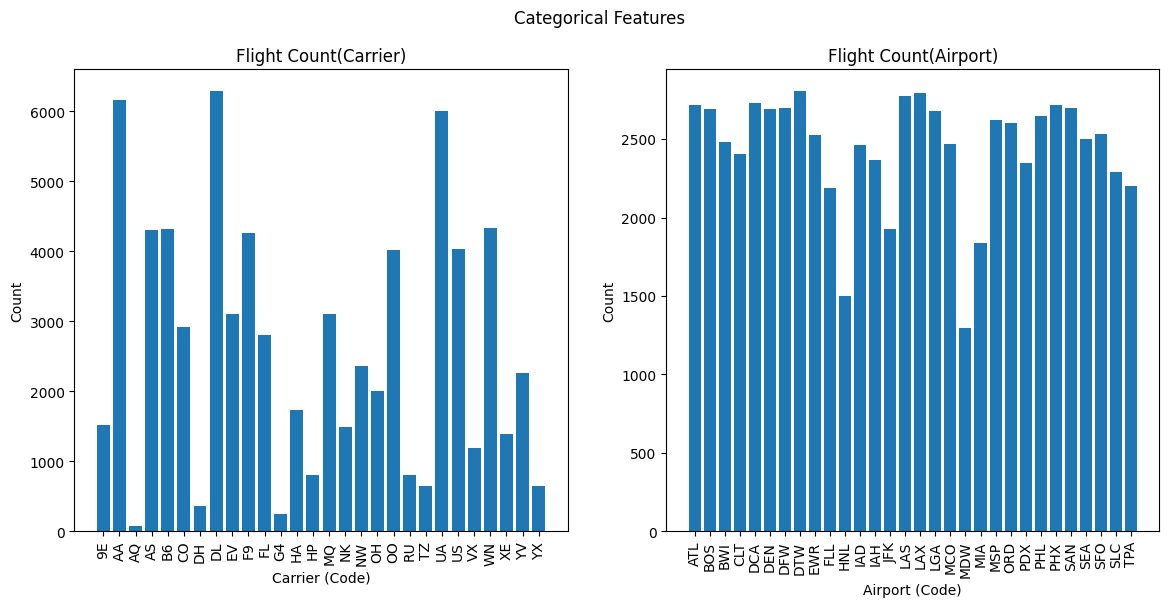

In [25]:
# Countplot for a categorical column 
carrier_counts = flight_data_df.groupby(['carrier', 'carrier_name']).size().reset_index(name='count')
airport_counts = flight_data_df.groupby(['airport', 'airport_name']).size().reset_index(name='count')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Categorical Features")
# Create labels combining carrier code and name for the plot
#carrier_counts['label'] = carrier_counts['carrier'] + " - " + carrier_counts['carrier_name'] #for longer labels
carrier_counts['label'] = carrier_counts['carrier'] 
#carrier_counts['label'] = carrier_counts['airport'] + " - " + carrier_counts['airport_name']
airport_counts['label'] = airport_counts['airport'] 

# Plot the updated graph 
axes[0].bar(carrier_counts['label'], carrier_counts['count'])
axes[0].set_xticklabels(carrier_counts['label'],rotation=90)
axes[0].set_xlabel("Carrier (Code)")
axes[0].set_ylabel("Count")
axes[0].set_title("Flight Count(Carrier)")

axes[1].bar(airport_counts['label'], airport_counts['count'])
axes[1].set_xticklabels(airport_counts['label'],rotation=90)
axes[1].set_xlabel("Airport (Code)")
axes[1].set_ylabel("Count")
axes[1].set_title("Flight Count(Airport)")

plt.show()

This figure contains two bar charts side by side, labeled under the title "Categorical Features", which compare flight counts based on different categorical variables.

*   **Flight Count By Carrier**: Also represents the most busiest airlines in the US aviation. The x-axis represents different carrier codes (e.g., 9E, AA, AS, DL, etc.).The y-axis represents the count of flights for each carrier.The height of each bar indicates the total number of flights operated by that carrier. Some carriers have significantly more flights than others, indicating a major presence in the airline industry such as 9E,DH,NW and OO. Smaller airlines have significantly fewer flights, possibly indicating they are regional or low-cost carriers.

*  **Flight Count By Airport**: Also represents the most busiest airlines in the US aviation. The x-axis represents different airport codes (e.g., ATL, BOS, DFW, LAX, etc.).The y-axis represents the count of flights for each airport. The height of each bar indicates the total number of flights recorded at each airport. Some airports handle more flights than others, which suggests they are major hubs in the air traffic network such as ATL, FDW,DTW. The spread of flight counts across different airports indicates the variability in air traffic density among airports.

Now since we have analysed the clean dataset. lets dive into the various kinds of Feature categories based on:

1. Total Delay Duration (arr_delay, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay)
2. Delay Causes (arr_del15,carrier_ct, weather_ct, nas_ct, security_ct, late_aircraft_ct)
3. Flight Operations (arr_flights, arr_cancelled, arr_diverted)


## Total Delay Duration Feature Analysis

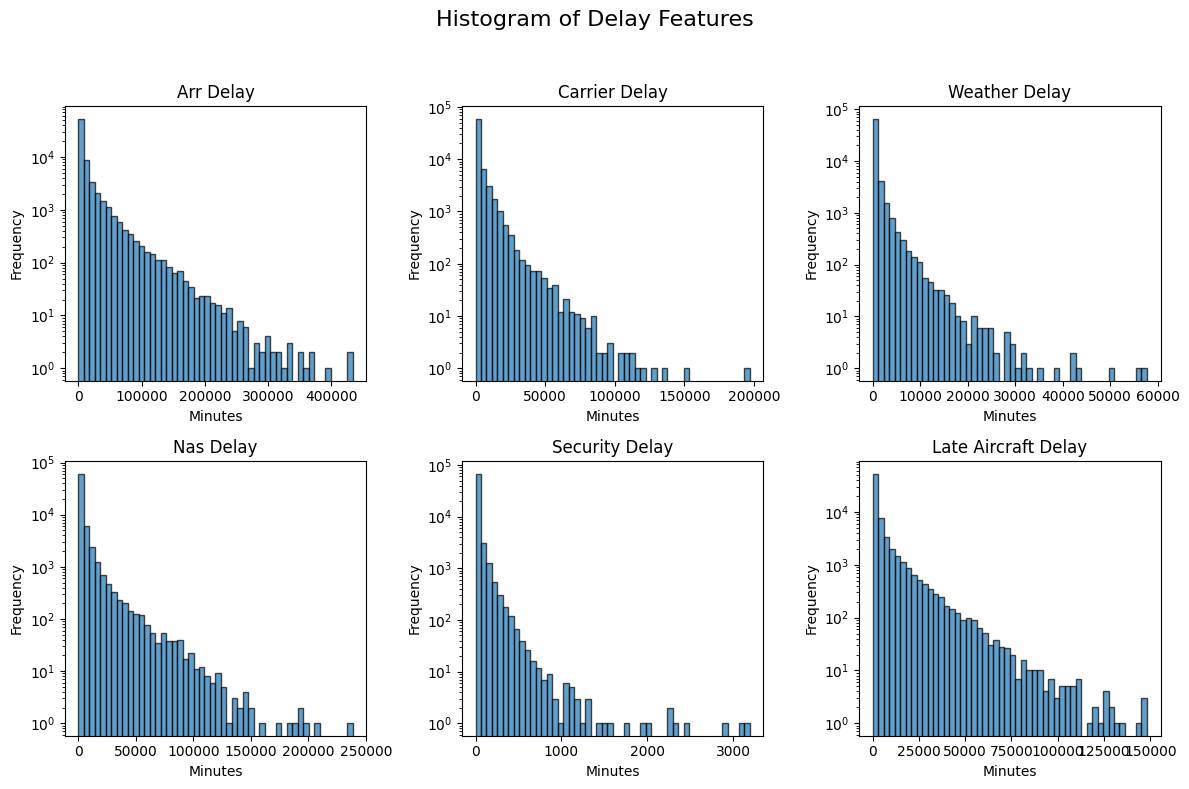

In [26]:
#Delay Analysis

# Select delay-related columns for visualization
delay_columns = ["arr_delay", "carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]

# Plot histograms for delay distributions
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, col in enumerate(delay_columns):
    ax = axes[i // 3, i % 3]  # Determine subplot position
    ax.hist(flight_data_df[col], bins=50, edgecolor='black', alpha=0.7)
    ax.set_title(col.replace("_", " ").title())
    ax.set_xlabel("Minutes")
    ax.set_ylabel("Frequency")
    ax.set_yscale("log")  # Log scale to handle skewness

# Add main title
fig.suptitle("Histogram of Delay Features", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit main title
plt.show()

This figure contains six histograms, each representing the distribution of delay times for different causes of airline delays. X-axis represents the delay time in minutes for each delay category. Y-axis represents how often a delay of a particular duration occurs and the logarithmic scale (base 10) helps visualize the skewed nature of delays, where most delays are short, but some are very long. Some of the observations from each histogram are summarised as follows:

1. Arr Delay(Arrival Delay): Most flights experience short arrival delays, but some extreme cases go beyond 400,000 minutes (potentially due to data errors or extreme disruptions).

2. Carrier Delay: Delays caused by airline operations (e.g., maintenance, crew shortages). Most are short, but some exceed 150,000 minutes, showing a long tail distribution.

3. Weather Delay: Caused by bad weather (storms, fog, snow, etc.). Usually shorter than other delays, but some extreme cases exist.

4. NAS Delay(National Aviation System): Includes air traffic control delays, congestion, and security protocols. Similar pattern to other delay types but often shorter than carrier delays.

5. Security Delay: Includes security-related incidents, screenings, and lockdowns. Smallest delays overall, rarely exceeding 3,000 minutes.

6. Late Aircraft Delay:Delays caused by late incoming aircraft affecting subsequent flights. Some of the longest delays, exceeding 150,000 minutes in extreme cases.

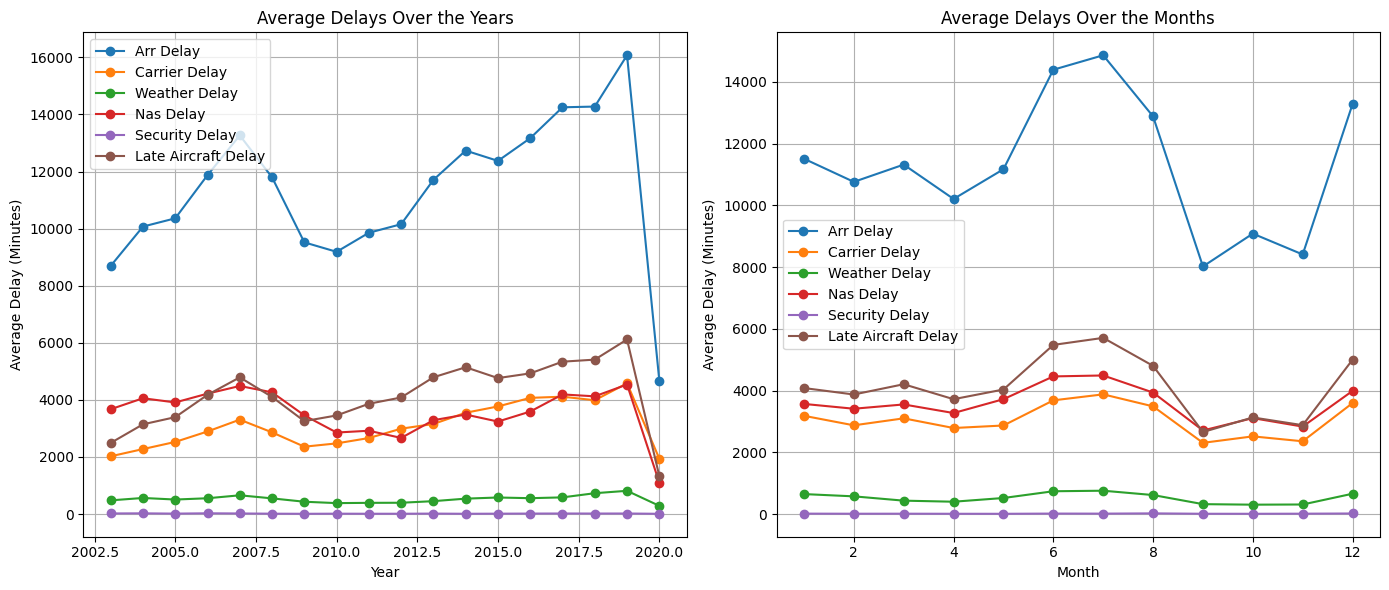

In [27]:
# Group data by year and calculate mean delays
yearly_delays = flight_data_df.groupby("year")[delay_columns].mean()

# Group data by year and calculate mean delays
monthly_delays = flight_data_df.groupby("month")[delay_columns].mean()

# Create subplots for year and month trends
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot trends over year
for col in delay_columns:
    axes[0].plot(yearly_delays.index, yearly_delays[col], marker='o', label=col.replace("_", " ").title())

axes[0].set_title("Average Delays Over the Years")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Average Delay (Minutes)")
axes[0].legend()
axes[0].grid(True)

# Plot trends over month
for col in delay_columns:
    axes[1].plot(monthly_delays.index, monthly_delays[col], marker='o', label=col.replace("_", " ").title())

axes[1].set_title("Average Delays Over the Months")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Average Delay (Minutes)")
axes[1].legend()
axes[1].grid(True)

# # Remove individual subplot legends
# axes[0].legend().remove()
# axes[1].legend().remove()

# # Add a single legend for both plots
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, title="Delay Cause", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show the combined figure
plt.tight_layout()
plt.show()

The above graph represents the Yearly Treand(2003-2020) and Seasonal Trends(Jan-Dec) affecting the various delay features. The X axis represents the Year(left Curve) and Month(right Curve) and The Y axis represents the delay in minutes. Some of the observations are:

**Average Delays Over the Years(left):**

1. Arrival Delay (Blue Line): The most significant trend, gradually increasing over the years, peaking around 2020, and then dropping suddenly.

2. Late Aircraft Delay (Brown Line): Shows a similar increasing trend, indicating that late arrivals impact future flights.

3. Carrier Delay (Orange Line): Also increases but at a lower rate.

4. NAS Delay (Red Line): Shows fluctuations, likely due to changes in air traffic control efficiency or airport congestion.

5. Security Delay (Purple Line): Remains low and stable, meaning security-related delays have minimal impact over time.

6. Weather Delay (Green Line): Slight increase over time, but remains relatively low compared to other types of delays.

The delay trend consistently follows a upward trajectory from 2003-2019 and drops sharply in 2019-2020 which can be attributed to Corona Pandemic.

**Average Delays Over the Months(Right):**

1. Arrival Delays (Blue Line) fluctuate significantly, with peaks in June-July and December, corresponding to peak travel seasons.

2. Late Aircraft Delays (Brown) follow the same pattern, further confirming the cascading delay effect.

3. Carrier Delays (Orange) and NAS Delays (Red) also peak in summer and December, showing congestion issues.

4. Weather Delays (Green) remain relatively stable but slightly increase in winter months (January, November, December), likely due to storms and snow.

5. Security Delays (Purple) remain consistently low, with no major seasonal impact.



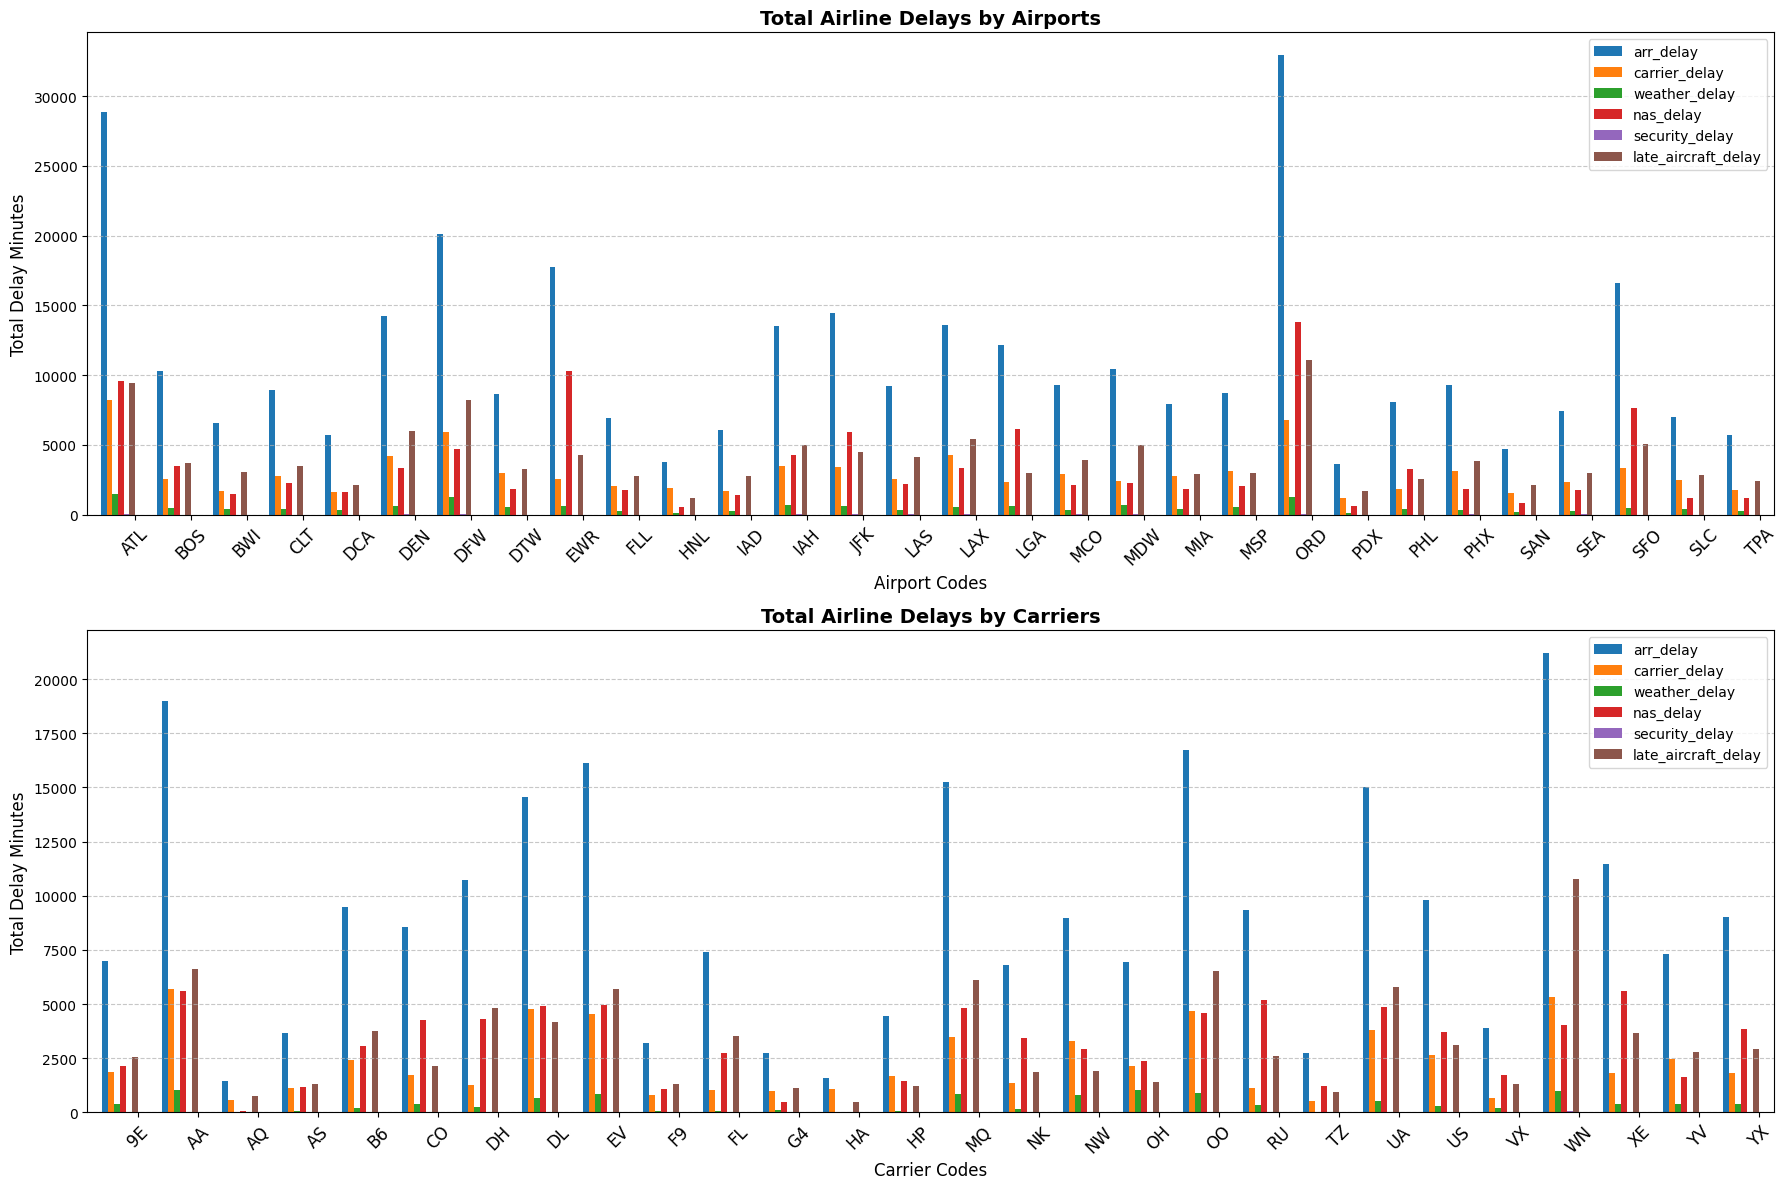

In [28]:
# Group data 
airport_name_delays = flight_data_df.groupby("airport")[delay_columns].mean()
carrier_name_delays = flight_data_df.groupby("carrier")[delay_columns].mean()

# Create subplots (stacked vertically)
fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharex=False)

# Plot airline delays by airport with spacing
airport_name_delays.plot(kind="bar", ax=axes[0], width=0.6, position=1)
axes[0].set_title("Total Airline Delays by Airports", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Airport Codes", fontsize=12)
axes[0].set_ylabel("Total Delay Minutes", fontsize=12)
axes[0].grid(axis='y', linestyle="--", alpha=0.7)
axes[0].set_xticks(range(len(airport_name_delays.index)))  # Set correct x-ticks with spacing
axes[0].set_xticklabels(airport_name_delays.index, fontsize=12,rotation=45, ha="center")

# Plot airline delays by carrier with spacing
carrier_name_delays.plot(kind="bar", ax=axes[1], width=0.6, position=1)
axes[1].set_title("Total Airline Delays by Carriers", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Carrier Codes", fontsize=12)
axes[1].set_ylabel("Total Delay Minutes", fontsize=12)
axes[1].grid(axis='y', linestyle="--", alpha=0.7)
axes[1].set_xticks(range(len(carrier_name_delays.index)))  # Set correct x-ticks with spacing
axes[1].set_xticklabels(carrier_name_delays.index, fontsize=12, rotation=45, ha="center")

# # Remove individual subplot legends
# axes[0].legend().remove()
# axes[1].legend().remove()

# # Add a single legend for both plots
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, title="Delay Cause", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to fit everything neatly
plt.tight_layout()
plt.show()

This figure consists of two bar charts, each representing the total delay minutes for different causes of airline delays, grouped by airports (top) and carriers (bottom).

Some observations from both the graphs are summarised as follows:

1. Total Airline Delays by Airports: Xaxis- Aiport Code, Yaxis- Total Delay minutes
    
    *  Arrival Delays (Blue Bars) are the largest component of total delays at most airports.
    * Airports like ATL, ORD, MSP have significantly high delays, possibly due to high traffic and congestion.
    * Carrier delays (Orange), NAS delays (Red), and late aircraft delays (Brown) contribute significantly but vary by airport.
    * Weather delays (Green) and Security delays (Purple) are generally smaller but present in some cases.

2. Total Airline Delays by Carriers: Xaxis- Carrier Code, Yaxis- Total Delay minutes
    
    * Arrival Delays (Blue) dominate across most airlines.
    * Some airlines (e.g., DL, UA, AA, and WN) experience significantly high delays, likely due to their high flight volume.
    * Late Aircraft Delays (Brown) are another major cause, indicating that delays cascade across flights.
    * Smaller airlines (right side) generally have lower total delays, likely due to fewer operations.

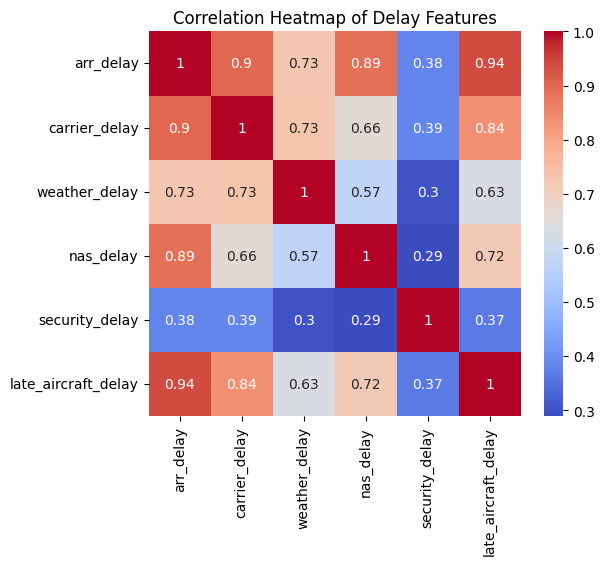

In [29]:
plt.figure(figsize=(6, 5))
sns.heatmap(flight_data_df[delay_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Delay Features')
plt.show()

This heatmap visualizes the correlation coefficients between different types of airline delays. Red being closer to 1.0 represents Strong positive correlation and Blue being closer to 0.0 or negative represents weak or no correlationThe color intensity indicates the strength of the correlation. Some of the observations are as follows:

1. **Arrival Delay & Late Aircraft Delay (0.94)**: Flights arriving late strongly correlate with previous flights arriving late. Late aircraft delays cause ripple effects on future flights.
2. **Arrival Delay & Carrier Delay (0.90)**: Airline-related delays (maintenance, crew issues) significantly impact overall arrival delays.
3. **Carrier Delay & Weather Delay (0.73)**: Weather issues affect airline operations, leading to carrier-related delays.
4. **Arrival Delay & NAS Delay (0.89)**: National Airspace System (NAS) delays (congestion, air traffic control issues) strongly contribute to overall arrival delays.
5. **Carrier Delay & Late Aircraft Delay (0.84)**: When one flight is late due to airline operations, the next flight is also affected.
6. **Weather Delay & Late Aircraft Delay (0.63)** : Bad weather can cause cascading effects, leading to late aircraft delays.
7. **NAS Delay & Late Aircraft Delay (0.72)**: Air traffic congestion often results in late aircraft arriving at the gate.
8. **Security Delay vs. Other Delays (0.29 - 0.39)**: Security delays are relatively independent from other types of delays.

Now we focus on Delay Count feature analysis.

## Delay Count Feature Analysis

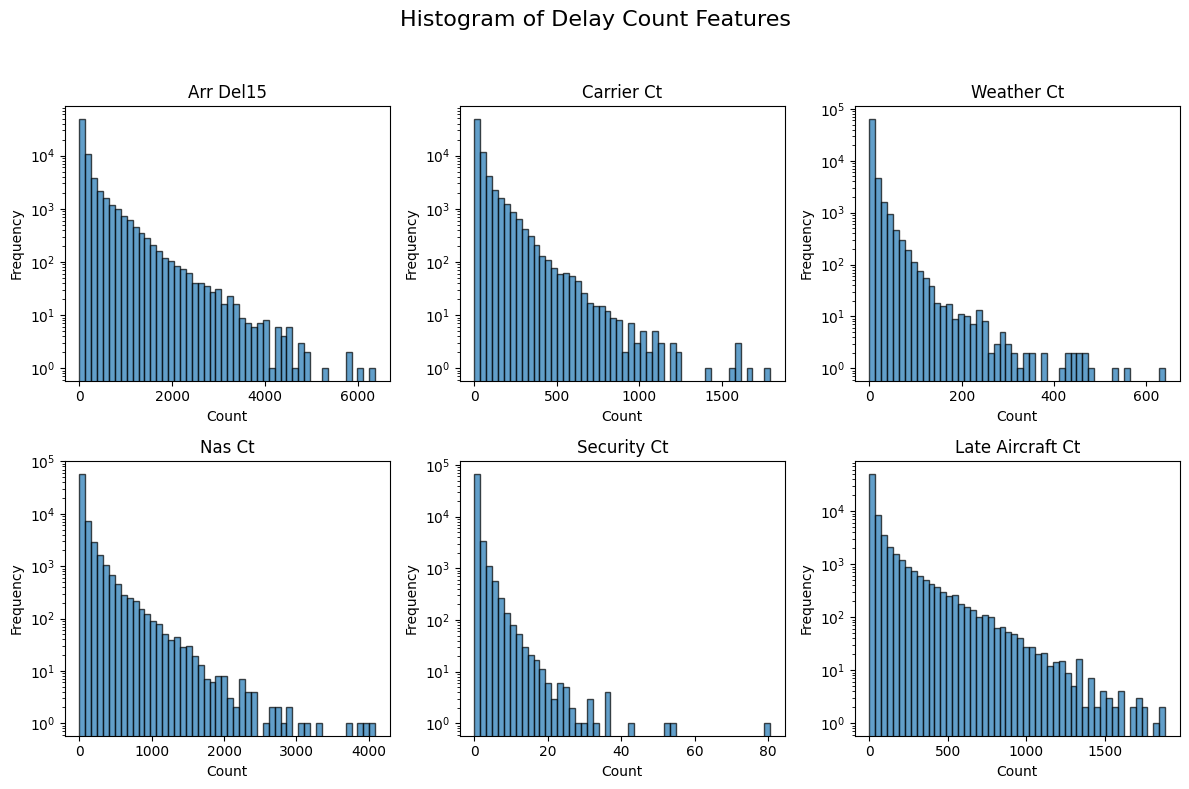

In [30]:
#Count Analysis

# Select delay-related columns for visualization
delay_count_columns = ["arr_del15", "carrier_ct", "weather_ct", "nas_ct", "security_ct", "late_aircraft_ct"]

# Plot histograms for delay distributions
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, col in enumerate(delay_count_columns):
    ax = axes[i // 3, i % 3]  # Determine subplot position
    ax.hist(flight_data_df[col], bins=50, edgecolor='black', alpha=0.7)
    ax.set_title(col.replace("_", " ").title())
    ax.set_xlabel("Count")
    ax.set_ylabel("Frequency")
    ax.set_yscale("log")  # Log scale to handle skewness

# Add main title
fig.suptitle("Histogram of Delay Count Features", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit main title
plt.show()

This figure consists of six histograms, each representing the distribution of counts for different categories of airline delays. The logarithmic y-axis helps visualize the data, as delay counts tend to be right-skewed similar to the delay features we previously analysed, meaning most values are small but a few are extremely large. Some other key observations are as follows:

1. Arr Del15 (Arrival Delays of 15+ Minutes): Most flights have fewer than 1,000 delays, but some airports or airlines have more than 6,000 delays.The long tail shows that a few cases experience significantly more delays than the average.

2. Carrier Ct (Carrier-Related Delays): Most values are concentrated near 0–500 delays. Some airlines experience over 1,500 carrier-related delays, likely due to operational inefficiencies such as maintenance or crew shortages.

3. Weather Ct (Weather-Related Delays): Weather-related delays tend to be less frequent compared to other delay types. Most values are below 200, but a few cases reach over 600 delays, likely during extreme weather events.

4. NAS Ct (National Aviation System Delays): NAS delays are generally higher than weather delays, often between 0–1,000 delays. A few instances reach over 4,000 delays, possibly due to air traffic congestion and airport inefficiencies.

5. Security Ct (Security Delays): The least frequent type of delay, with most values below 20. A few cases reach above 80, possibly due to security incidents or increased screening measures.

6. Late Aircraft Ct (Late Aircraft Delays): A significant contributor to flight disruptions, with many values in the 500–1,500 range. A few cases exceed 2,000 delays, showing how late flights cause cascading delays across the system.

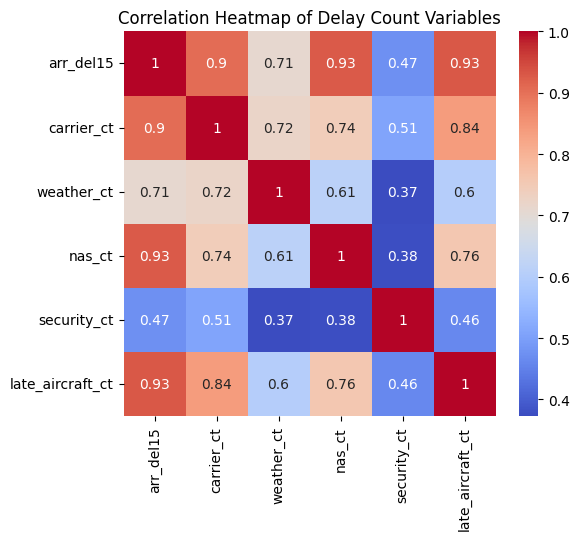

In [31]:
plt.figure(figsize=(6, 5))
sns.heatmap(flight_data_df[delay_count_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Delay Count Variables')
plt.show()

This heatmap shows the correlation coefficients between different types of delay counts in airline operations. Some of the observations are as follows:

1. Arr Del15 & Late Aircraft Ct (0.93): A very strong correlation, meaning late aircraft delays significantly contribute to overall arrival delays.

2. Arr Del15 & NAS Ct (0.93): National Airspace System (NAS) delays (congestion, air traffic control issues) strongly contribute to arrival delays.

3. Arr Del15 & Carrier Ct (0.90): Carrier-related delays (maintenance, crew, scheduling) are a major factor in arrival delays. Airlines with high carrier delays struggle with on-time arrivals.

4. Carrier Ct & Late Aircraft Ct (0.84): If an airline experiences carrier-related delays, it often results in late aircraft delays. Indicates cascading delays from airline operations.

5. Weather Ct & Carrier Ct (0.72): Weather delays affect airline operations, increasing carrier-related delays.

6. Weather Ct & NAS Ct (0.61): Weather conditions impact air traffic control, increasing NAS-related delays.

7. NAS Ct & Late Aircraft Ct (0.76): Air traffic congestion leads to late-arriving flights, affecting subsequent flight schedules.

8. Security Ct & Other Delays (0.37 - 0.51): Security delays have weak correlations with other delay types. These delays are often caused by TSA screenings, security threats, or operational decisions rather than air traffic congestion.

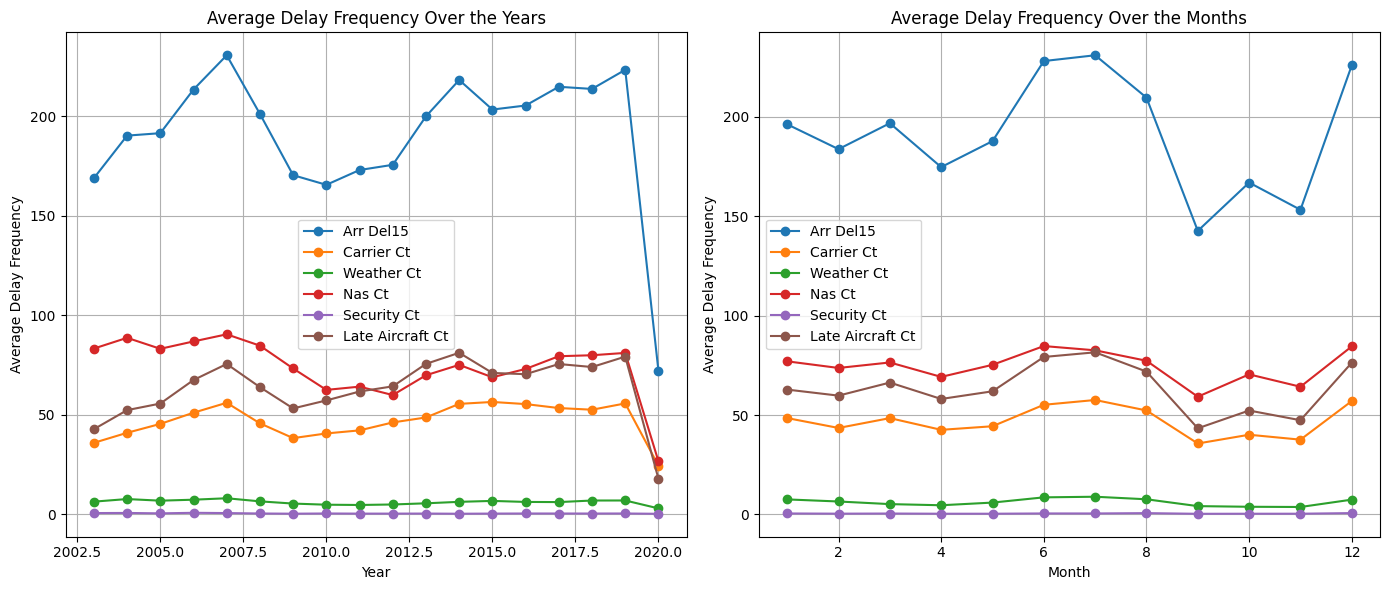

In [32]:
# Group data by year and calculate mean delays
yearly_delays = flight_data_df.groupby("year")[delay_count_columns].mean()

# Group data by year and calculate mean delays
monthly_delays = flight_data_df.groupby("month")[delay_count_columns].mean()

# Create subplots for year and month trends
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot trends over year
for col in delay_count_columns:
    axes[0].plot(yearly_delays.index, yearly_delays[col], marker='o', label=col.replace("_", " ").title())

axes[0].set_title("Average Delay Frequency Over the Years")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Average Delay Frequency")
axes[0].legend()
axes[0].grid(True)

# Plot trends over month
for col in delay_count_columns:
    axes[1].plot(monthly_delays.index, monthly_delays[col], marker='o', label=col.replace("_", " ").title())

axes[1].set_title("Average Delay Frequency Over the Months")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Average Delay Frequency")
axes[1].legend()
axes[1].grid(True)

# # Remove individual subplot legends
# axes[0].legend().remove()
# axes[1].legend().remove()

# # Add a single legend for both plots
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, title="Delay Cause", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show the combined figure
plt.tight_layout()
plt.show()

his figure consists of two line charts, representing the average frequency of different types of delays over years (left chart) and months (right chart). X-axis represents time from 2003 to 2020 or Months and Y-axis represents number of delays occurring on average per time period. Some of the observations are summarised as follows:

**Left Curve: Average Delay Frequency Over the Years**

1. Arr Del15 (Blue Line) - Arrival Delays Over 15 Minutes: Shows an upward trend from 2003 to 2006. Peaks around 2009–2011 before stabilizing. And drops sharply in 2020,likely due to reduced air traffic during the COVID-19 pandemic.

2. Nas Ct (Red Line) - National Aviation System Delays: Fluctuates but remains relatively stable. Peaks in 2007 and 2017, possibly due to congestion or regulatory changes.

3. Carrier Ct (Orange Line) - Carrier Delays: Gradually increasing trend over the years.Small dip around 2008–2010, followed by a steady rise and drop at 2020.

4. Late Aircraft Ct (Brown Line): Follows a similar trend to arrival delays, confirming that late flights cause cascading delays.

5. Weather Ct (Green Line): Generally low and stable, indicating weather-related delays are less frequent than other delay types.

6. Security Ct (Purple Line): Consistently low frequency, meaning security delays rarely contribute significantly to total delays.

So we observe a upward trend till 2019 and then a drop. NAS and carrier delays fluctuate but remain significant contributors to overall delay trends.

**Right Curve: Average Delay Frequency Over the Months**

1. Arr Del15 (Blue Line) - Arrival Delays: Highest in summer months (June–July) and December (holiday season). Drops around September–October, when air traffic demand is lower.

2. Carrier Ct & Late Aircraft Ct (Orange & Brown Lines): Carrier-related and late aircraft delays follow a similar pattern, peaking in mid-year and December.

3. NAS Ct (Red Line) - Air Traffic Delays: Peaks in summer and winter holiday months, showing that air traffic congestion is a major delay factor.

4. Weather Ct (Green Line): Higher in winter months (January, November, December), indicating weather disruptions during these periods.

5. Security Ct (Purple Line): Remains low throughout the year, with no major seasonal impact.

Peak travel months (June–July, December) have the highest delays, indicating congestion-related delays. Winter months have higher weather delays, while summer months see increased carrier and NAS delays. Security-related delays remain stable year-round.



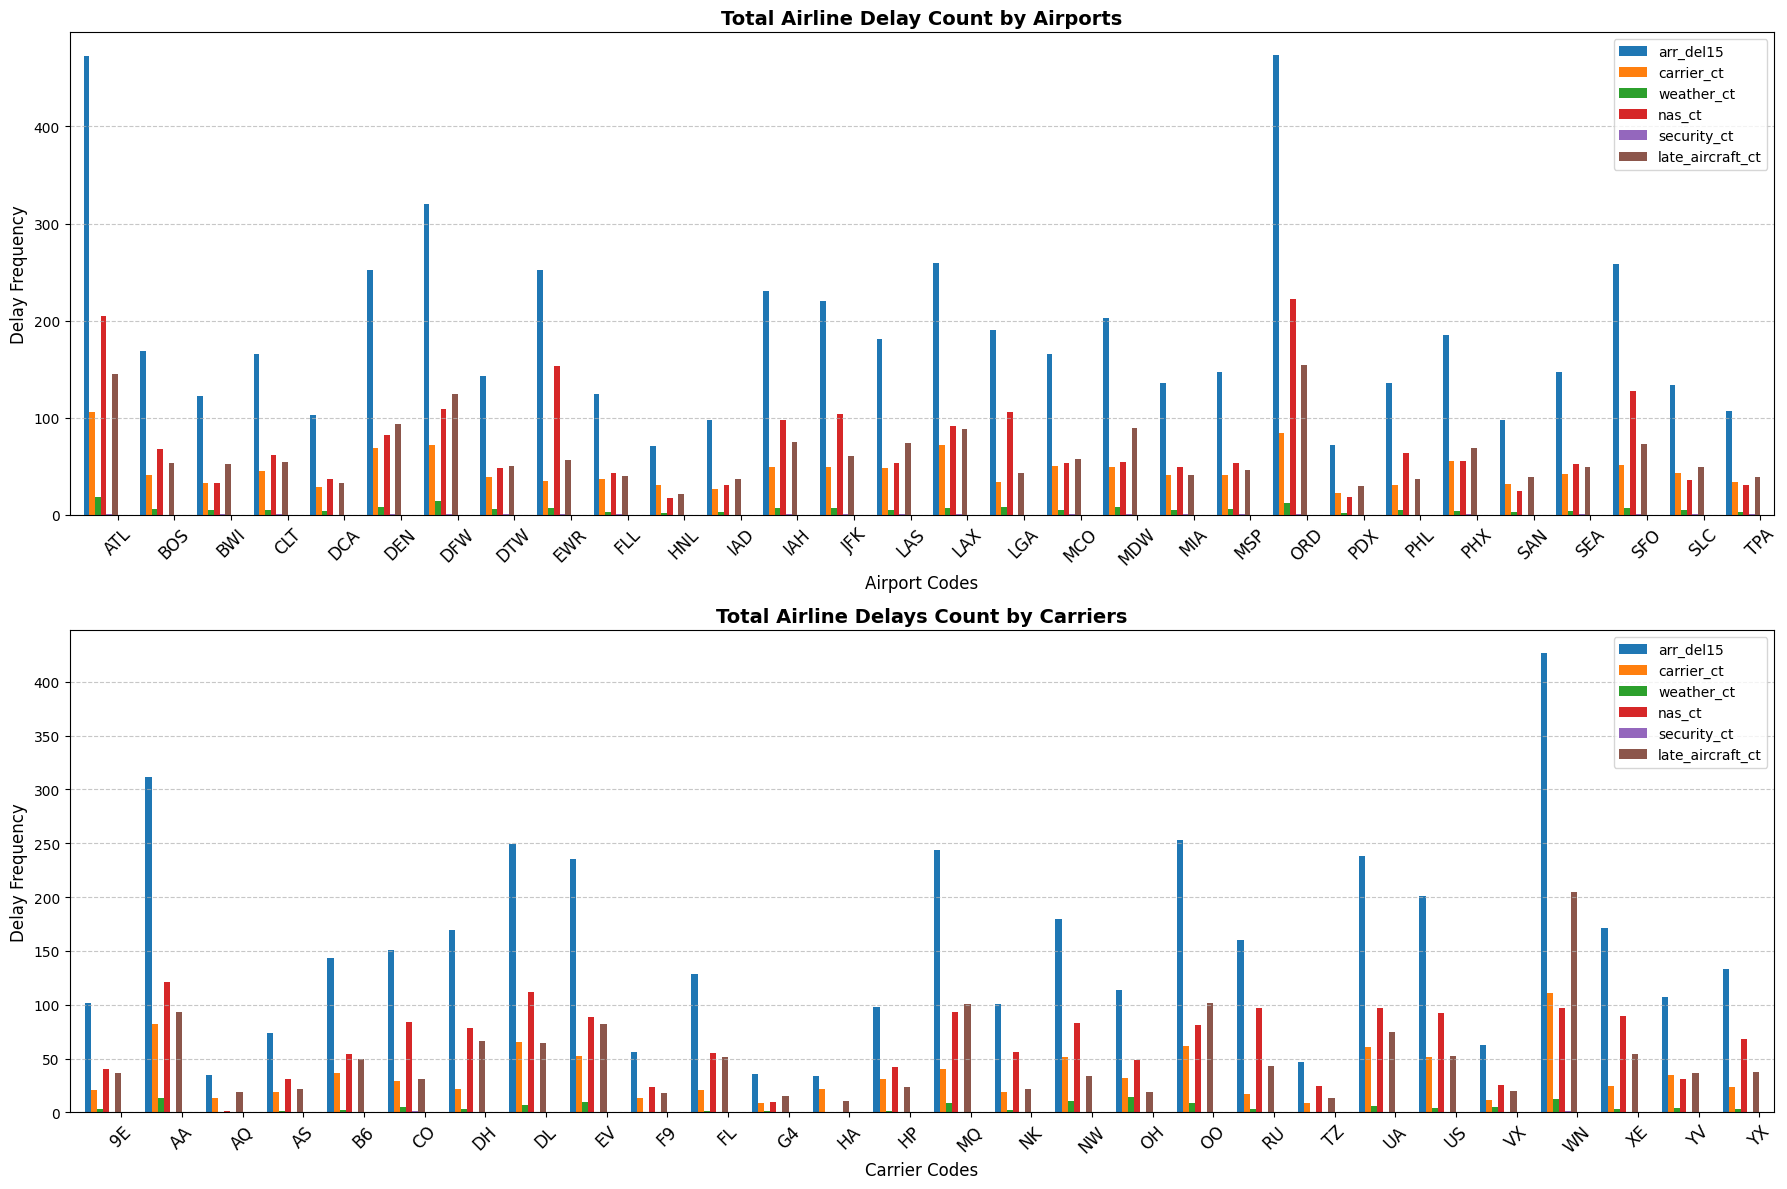

In [33]:
# Group data 
airport_name_delay_count = flight_data_df.groupby("airport")[delay_count_columns].mean()
carrier_name_delay_count = flight_data_df.groupby("carrier")[delay_count_columns].mean()

# Create subplots (stacked vertically)
fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharex=False)

# Plot airline delays by airport with spacing
airport_name_delay_count.plot(kind="bar", ax=axes[0], width=0.6, position=1)
axes[0].set_title("Total Airline Delay Count by Airports", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Airport Codes", fontsize=12)
axes[0].set_ylabel("Delay Frequency", fontsize=12)
axes[0].grid(axis='y', linestyle="--", alpha=0.7)
axes[0].set_xticks(range(len(airport_name_delays.index)))  # Set correct x-ticks with spacing
axes[0].set_xticklabels(airport_name_delays.index, fontsize=12,rotation=45, ha="center")

# Plot airline delays by carrier with spacing
carrier_name_delay_count.plot(kind="bar", ax=axes[1], width=0.6, position=1)
axes[1].set_title("Total Airline Delays Count by Carriers", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Carrier Codes", fontsize=12)
axes[1].set_ylabel("Delay Frequency", fontsize=12)
axes[1].grid(axis='y', linestyle="--", alpha=0.7)
axes[1].set_xticks(range(len(carrier_name_delays.index)))  # Set correct x-ticks with spacing
axes[1].set_xticklabels(carrier_name_delays.index, fontsize=12,rotation=45, ha="center")

# # Remove individual subplot legends
# axes[0].legend().remove()
# axes[1].legend().remove()

# # Add a single legend for both plots
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, title="Delay Cause", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to fit everything neatly
plt.tight_layout()
plt.show()

This figure consists of two bar charts, each displaying the total delay counts for different categories of delays by airport (top) and by carrier (bottom). X-axis represents Airport codes/ carrier codes and Y-axis denotes the Delay Frequency.

**Total Airline Delay Count by Airports(Top):**

1. Arrival Delays (Blue Bars) dominate in most airports.

2. Hubs like ATL (Atlanta), ORD (Chicago O'Hare), and MSP (Minneapolis) have significantly higher delays, suggesting high air traffic congestion.

3. NAS Delays (Red) and Late Aircraft Delays (Brown) are also significant contributors, reinforcing that delays at these airports often cascade into future flights.

4. Security Delays (Purple) and Weather Delays (Green) are relatively minor, but they still contribute in some cases.

**Total Airline Delay Count by Carrier(Bottom):**

1. Arrival Delays (Blue) are again the most dominant delay type across all airlines.

2. Some airlines (e.g., DL, UA, WN, AA) experience significantly higher delays, which makes sense because they operate more flights.

3. NAS Delays (Red) and Late Aircraft Delays (Brown) are also major contributors, meaning airlines with a high delay frequency likely suffer from systemic scheduling and turnaround issues.

4. Carrier Delays (Orange) vary between airlines, meaning some airlines may have more operational inefficiencies than others.

## Operational Feature Analysis

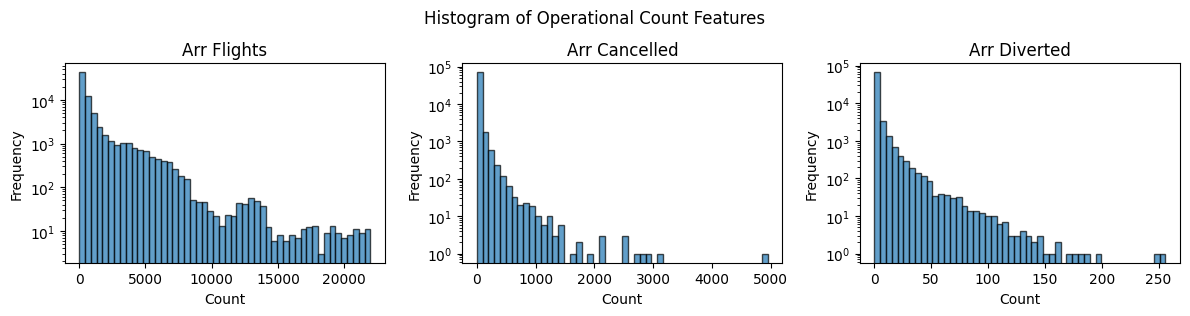

In [34]:
#Arrival, cancellation and Diversion feature analysis

# Select operational-related columns for visualization
operational_count_columns = ["arr_flights", "arr_cancelled", "arr_diverted"]

# Plot histograms for count-related variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(operational_count_columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(flight_data_df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    plt.title(col.replace("_", " ").title())
    plt.xlabel("Count")
    plt.ylabel("Frequency")
    plt.yscale("log")  # Log scale to handle skewness

plt.suptitle("Histogram of Operational Count Features")
plt.tight_layout()
plt.show()

This figure consists of three histograms, each representing the distribution of different operational flight metrics on a logarithmic scale for frequency. X-axis (Count) represents the number of arriving flights at various airports or within different time periods. Y-axis (Frequency - Log Scale) represents how often a certain number of flights occur. Some observations are as follows:

1. Arr Flights (Arrival Flights): Most instances have fewer than 5,000 arrival flights. There is a long tail, meaning a few cases have extremely high numbers of arriving flights (over 20,000). The distribution is right-skewed, showing that most airports handle a lower number of flights, while a few major airports handle an extremely high volume.

2. Arr Cancelled (Cancelled Arrival Flights): The vast majority of cases have very few cancelled flights (close to 0). Some instances show high cancellation counts exceeding 3,000–5,000 flights, likely due to weather events, strikes, or operational disruptions. The long tail suggests that large-scale disruptions are rare but can be significant.

3. Arr Diverted (Diverted Arrival Flights): Most airports or time periods have less than 50 diversions. A few extreme cases show more than 200 diversions, likely due to severe weather conditions, emergencies, or air traffic congestion. The distribution is heavily skewed, meaning most flights arrive at their intended destination without diversion. Most flights are not cancelled or diverted, but when cancellations or diversions occur, they can be extreme.

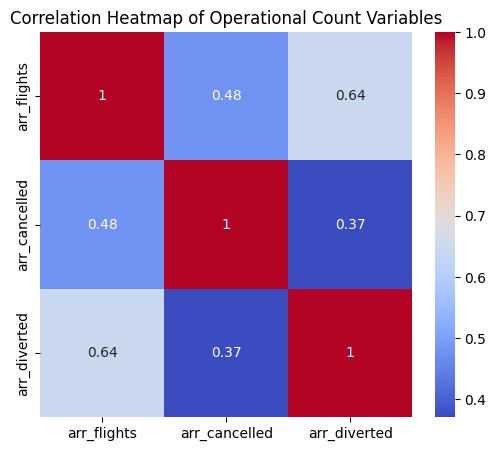

In [35]:
plt.figure(figsize=(6, 5))
sns.heatmap(flight_data_df[operational_count_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Operational Count Variables')
plt.show()

This heatmap displays the correlation coefficients between different operational flight metrics such as arr_flights (Arrival Flights), arr_cancelled (Cancelled Arrival Flights) and arr_diverted (Diverted Arrival Flights). Some of the observations are as follows:

1. Arrival Flights & Diversions (0.64): A moderate correlation suggests that airports with more arriving flights also experience more diversions. This could be due to higher air traffic congestion or adverse weather affecting high-volume airports.

2. Arrival Flights & Cancellations (0.48): A moderate correlation means that higher flight volumes sometimes lead to increased cancellations, but the relationship is not as strong. Cancellations are often event-driven (e.g., weather, strikes, emergencies), meaning they are not always proportional to the number of flights.

3. Cancellations & Diversions (0.37): A weak correlation suggests that cancellations and diversions are usually independent. Cancelled flights often result from operational issues, while diversions typically occur due to real-time conditions (e.g., weather, air traffic congestion).



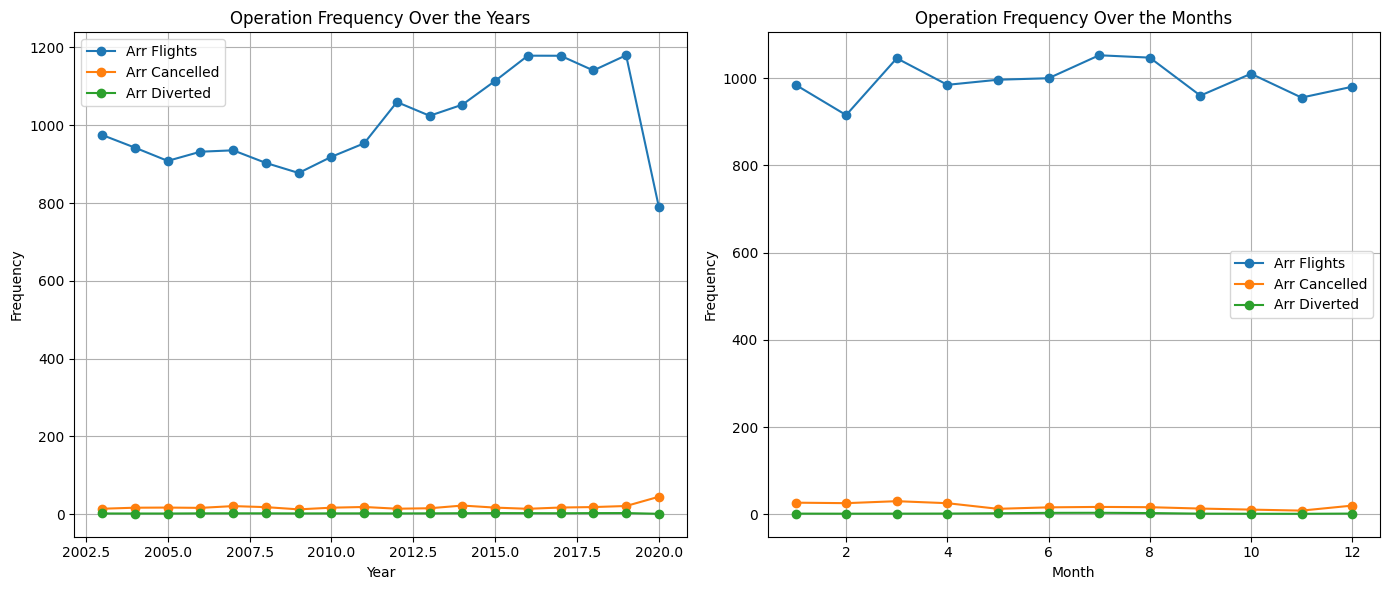

In [36]:
# Group data by year and month
yearly_delays = flight_data_df.groupby("year")[operational_count_columns].mean()
monthly_delays = flight_data_df.groupby("month")[operational_count_columns].mean()

# Create subplots for year and month trends
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot trends over year
for col in operational_count_columns:
    axes[0].plot(yearly_delays.index, yearly_delays[col], marker='o', label=col.replace("_", " ").title())

axes[0].set_title("Operation Frequency Over the Years")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Frequency")
axes[0].legend()
axes[0].grid(True)

# Plot trends over month
for col in operational_count_columns:
    axes[1].plot(monthly_delays.index, monthly_delays[col], marker='o', label=col.replace("_", " ").title())

axes[1].set_title("Operation Frequency Over the Months")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Frequency")
axes[1].legend()
axes[1].grid(True)

# # Remove individual subplot legends
# axes[0].legend().remove()
# axes[1].legend().remove()

# # Add a single legend for both plots
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, title="Delay Cause", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show the combined figure
plt.tight_layout()
plt.show()

This figure consists of two line charts that track the frequency of different flight operations over years (left chart) and months (right chart) for three operational metrics. X-axis (Year) represents 2002–2020 or Months. Y-axis (Average Delay in Minutes) represents the frequency. Some of the observations are as follows:

**Operation Over the Years(left curve):**

1. Arrival Flights (Blue Line): Steady increase from 2002 to ~2019, indicating growing flight traffic over time. Peaks around 2018-2019, showing the highest recorded flights. Sharp drop in 2020, likely due to COVID-19 reducing air travel demand.

2. Arr Cancelled (Orange Line): Remains relatively stable but with a slight increase over time. Noticeable increase around 2020, possibly due to flight restrictions during COVID-19.

3. Arr Diverted (Green Line): Very low and stable, meaning diversions are rare. Slight increase around 2018–2019, but not significant compared to total arrivals.

**Operation Over the Month(Right curve):**

1. Arrival Flights (Blue Line): Slightly higher in summer (June–July) and December, coinciding with peak travel seasons. Stable throughout the year, with small variations.

2. Arr Cancelled (Orange Line): Small peaks in winter months (January, November, December). Suggests weather-related cancellations increase during colder months.

3. Arr Diverted (Green Line): Very low and stable, with no significant seasonal pattern. Slight increase in winter months, possibly due to bad weather.

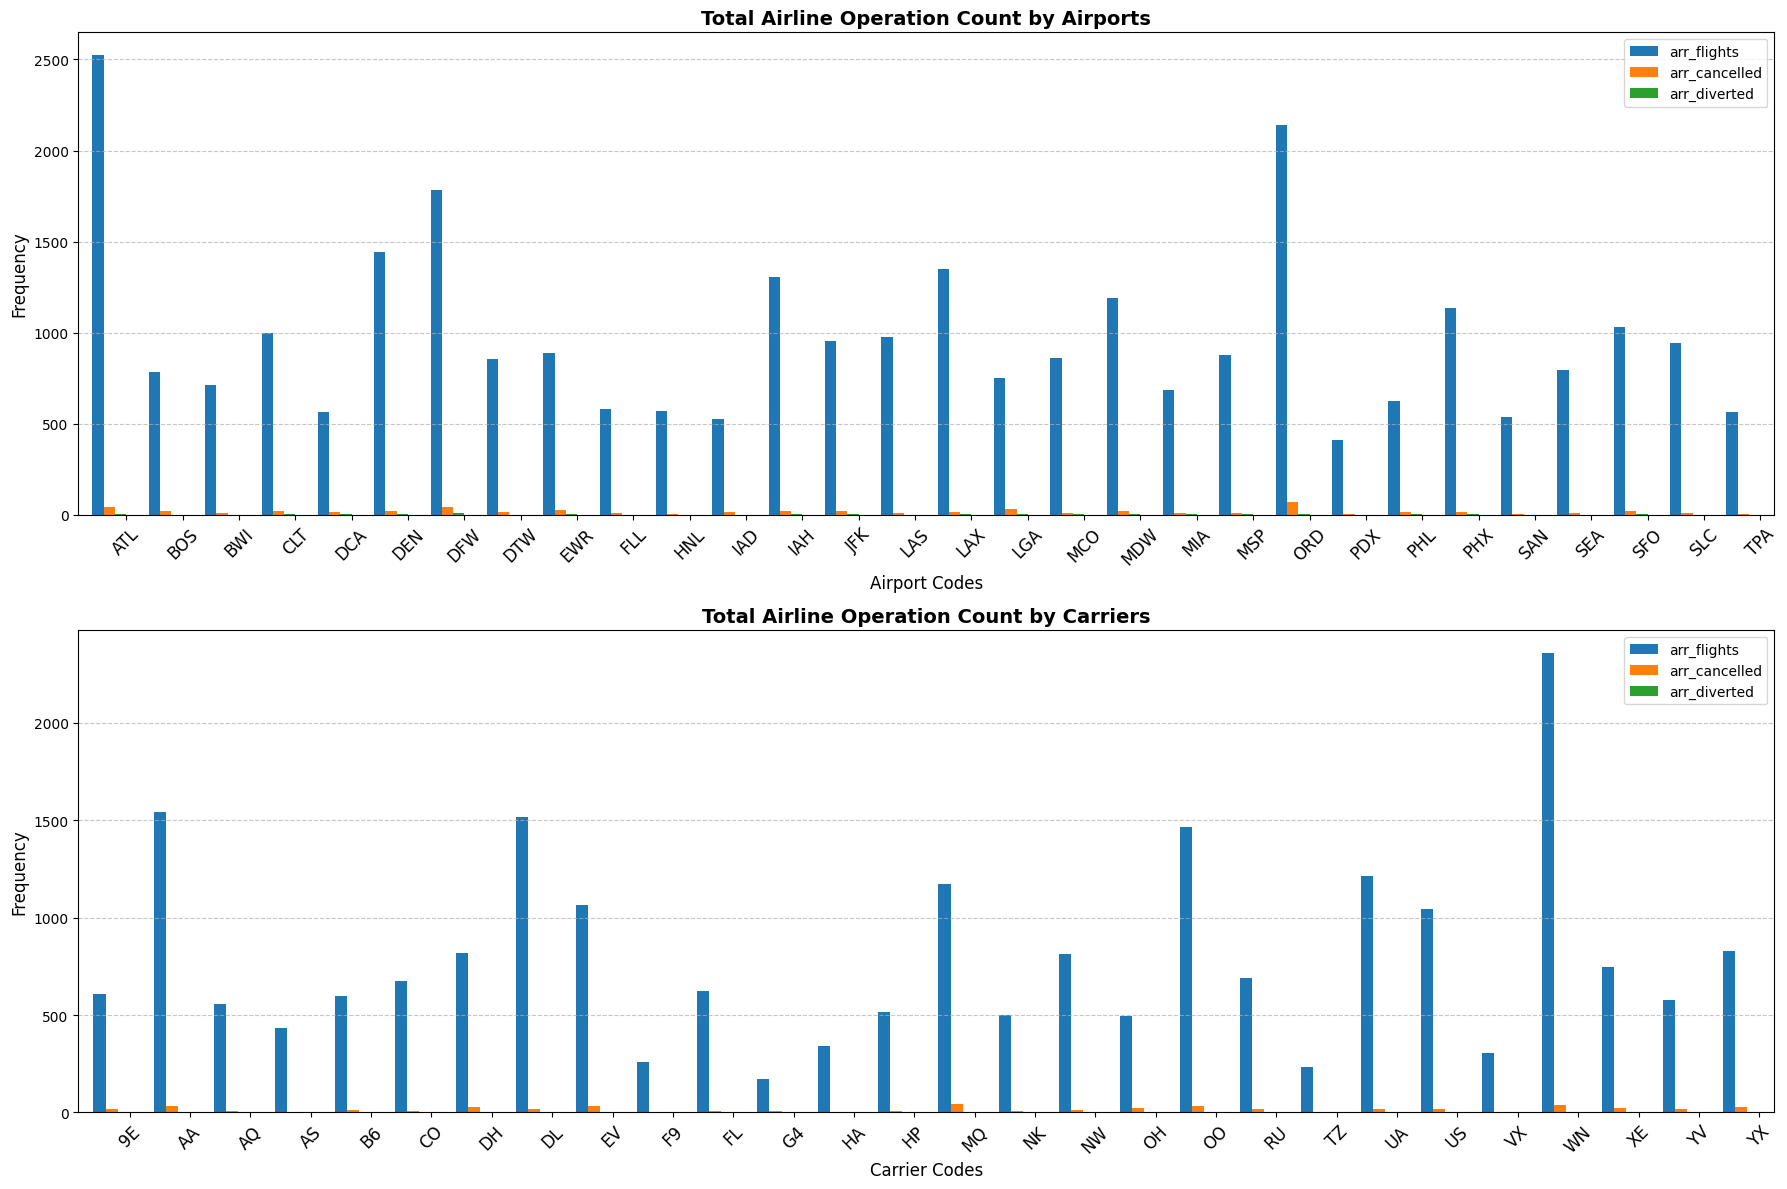

In [37]:
# Group data
airport_name_op_count = flight_data_df.groupby("airport")[operational_count_columns].mean()
carrier_name_op_count = flight_data_df.groupby("carrier")[operational_count_columns].mean()

# Create subplots (stacked vertically)
fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharex=False)

# Plot airline delays by airport with spacing
airport_name_op_count.plot(kind="bar", ax=axes[0], width=0.6, position=1)
axes[0].set_title("Total Airline Operation Count by Airports", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Airport Codes", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].grid(axis='y', linestyle="--", alpha=0.7)
axes[0].set_xticks(range(len(airport_name_delays.index)))  # Set correct x-ticks with spacing
axes[0].set_xticklabels(airport_name_delays.index, fontsize=12,rotation=45, ha="center")

# Plot airline delays by carrier with spacing
carrier_name_op_count.plot(kind="bar", ax=axes[1], width=0.6, position=1)
axes[1].set_title("Total Airline Operation Count by Carriers", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Carrier Codes", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)
axes[1].grid(axis='y', linestyle="--", alpha=0.7)
axes[1].set_xticks(range(len(carrier_name_delays.index)))  # Set correct x-ticks with spacing
axes[1].set_xticklabels(carrier_name_delays.index, fontsize=12,rotation=45, ha="center")

# # Remove individual subplot legends
# axes[0].legend().remove()
# axes[1].legend().remove()

# # Add a single legend for both plots
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, title="Delay Cause", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to fit everything neatly
plt.tight_layout()
plt.show()

This figure consists of two bar charts displaying the total operation count for different airports (top chart) and airlines (bottom chart). X-axis represents various airports (e.g., ATL, LAX, ORD) or different airlines (e.g., AA, DL, UA). Y-axis (Frequency) represents the total number of arrival flights, cancellations, and diversions. Some of the observations are as follows:

**Total Airline Operation Count by Airports(Top):**

1. Arrival Flights (Blue) dominate all airports.

2. Major hub airports like ATL (Atlanta), ORD (Chicago O'Hare), MSP (Minneapolis), and DFW (Dallas) have significantly higher arrival flights.

3. Cancellations (Orange) are minimal but noticeable in some high-traffic airports (ORD, ATL, MSP).

4. Diversions (Green) are extremely rare, showing that most flights reach their intended destinations.

**Total Airline Operation Count by Carriers(Bottom):**

1. Arrival Flights (Blue) dominate across all airlines.

2. Major airlines like DL (Delta), AA (American Airlines), and UA (United Airlines) have significantly higher operations.

3. Cancellations (Orange) are relatively low but noticeable in large airlines.

4. Diversions (Green) remain extremely low, showing airlines effectively manage unexpected route changes.

In [38]:
#top 10 busiest Airport-Carrier
# Aggregate total flights by (airport, carrier) combination
busiest_airport_carrier = flight_data_df.groupby(["airport", "carrier"])["arr_flights"].sum()

# Get the top 10 busiest airport-carrier combinations
busiest_airport_carrier = busiest_airport_carrier.sort_values(ascending=False).head(10)

#top 10 Airport-Carrier with highest delays
# Aggregate total flights by (airport, carrier) combination
delay_airport_carrier = flight_data_df.groupby(["airport", "carrier"])["arr_del15"].sum()

# Get the top 10 busiest airport-carrier combinations
delay_airport_carrier = delay_airport_carrier.sort_values(ascending=False).head(10)

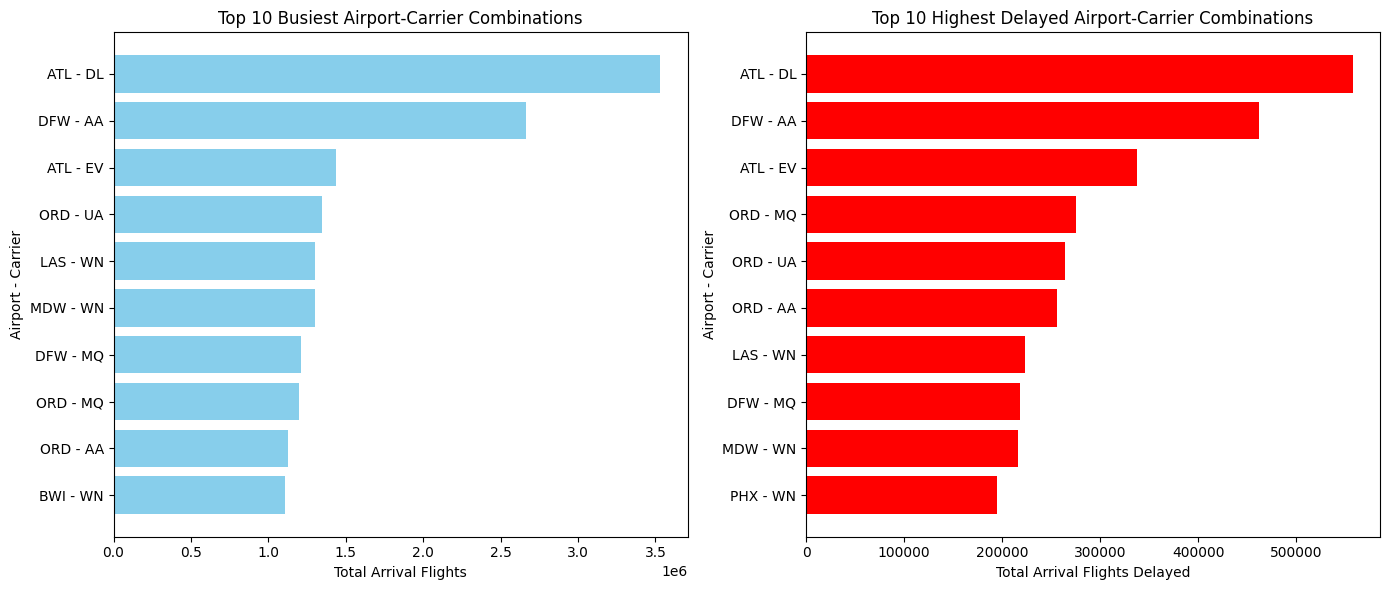

In [39]:
#Convert to DataFrame for plotting
busiest_airport_carrier_df = busiest_airport_carrier.reset_index()

#Convert to DataFrame for plotting
delay_airport_carrier_df = delay_airport_carrier.reset_index()

# Combine both graphs into a single figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the busiest airport-carrier combinations
axes[0].barh(
    busiest_airport_carrier_df["airport"] + " - " + busiest_airport_carrier_df["carrier"],
    busiest_airport_carrier_df["arr_flights"],
    color="skyblue",
)
axes[0].set_xlabel("Total Arrival Flights")
axes[0].set_ylabel("Airport - Carrier")
axes[0].set_title("Top 10 Busiest Airport-Carrier Combinations")
axes[0].invert_yaxis()  # Invert y-axis

# Plot the highest delayed airport-carrier combinations
axes[1].barh(
    delay_airport_carrier_df["airport"] + " - " + delay_airport_carrier_df["carrier"],
    delay_airport_carrier_df["arr_del15"],
    color="red",
)
axes[1].set_xlabel("Total Arrival Flights Delayed")
axes[1].set_ylabel("Airport - Carrier")
axes[1].set_title("Top 10 Highest Delayed Airport-Carrier Combinations")
axes[1].invert_yaxis()  # Invert y-axis

# Adjust layout and show the combined figure
plt.tight_layout()
plt.show()

This figure consists of two bar charts, each representing airport-carrier combinations in terms of: Total arrival flights (left chart) and Total delayed arrival flights (right chart).  X-axis (Total Arrival Flights) represents the number of flights operated by each airport-carrier combination or the total number of delayed flights for each airport-carrier combination. Y-axis (Airport - Carrier) displays the airport and airline code. Some of the observations are as follows:

**Top 10 Busiest Airport-Carrier Combinations(Left)**:

1. ATL - DL (Atlanta - Delta) is the busiest combination, with the highest total arrival flights.

2. DFW - AA (Dallas-Fort Worth - American Airlines) is the second busiest.

3. ORD (Chicago O'Hare) appears multiple times with different airlines, indicating its importance as a central hub.

4. Southwest Airlines (WN) dominates several key airports like LAS, MDW, and BWI, reflecting their focus on high-frequency operations.

**Top 10 Highest Delayed Airport-Carrier Combinations(Right)**

1. ATL - DL (Atlanta - Delta) also has the highest number of delayed flights, meaning high volume correlates with high delays.

2. DFW - AA (Dallas-Fort Worth - American Airlines) ranks second in delays, mirroring its high flight volume.

3. ORD - MQ, ORD - UA, and ORD - AA are among the most delayed, showing Chicago O'Hare (ORD) struggles with delays across multiple airlines.

4. Southwest Airlines (WN) has several highly delayed routes, including LAS, MDW, and PHX.



## Handling the Positively-Skewed data

Skewness is a statistical measure that describes the asymmetry of a data distribution around its mean. In simpler terms, it indicates whether the bulk of the data is bunched up on one side of the scale, leaving a long tail stretching out in the opposite direction. There are two types of skewness you encounter in data analysis:

* Positive Skewness: This occurs when the tail of the distribution extends towards higher values, on the right side of the peak. The majority of data points are clustered at the lower end of the scale, indicating that while most values are relatively low, there are a few exceptionally high values. The ‘SalePrice’ attribute in the Ames dataset exemplifies positive skewness, as most homes sell at lower prices, but a small number sell at significantly higher prices.

* Negative Skewness: Conversely, negative skewness happens when the tail of the distribution stretches towards lower values, on the left side of the peak. In this scenario, the data is concentrated towards the higher end of the scale, with fewer values trailing off into lower numbers. The ‘YearBuilt’ feature of the Ames dataset is a perfect illustration of negative skewness, suggesting that while a majority of houses were built in more recent years, a smaller portion dates back to earlier times.

As we notice that most of the numerical columns are positively skewed. Lets compute the skewness of the dataset:

In [40]:
# Identify numerical columns (excluding categorical ones)
numerical_columns = flight_data_df.select_dtypes(include=["float64", "int64"]).columns

# Calculate skewness for each numerical column
skewness = flight_data_df[numerical_columns].skew()

# Display skewness values
skewness.sort_values(ascending=False)

arr_cancelled          18.606788
security_delay         13.858273
security_ct            11.065540
weather_ct             10.365922
weather_delay           9.636809
arr_diverted            9.597753
nas_delay               7.008366
nas_ct                  6.232187
carrier_delay           6.151569
arr_delay               4.946274
carrier_ct              4.845478
late_aircraft_delay     4.759347
arr_del15               4.511703
late_aircraft_ct        4.345687
arr_flights             4.183024
year                    0.166714
month                  -0.033053
dtype: float64

From the above results, we see that most of the numerical columns have extremely high skewness(>2). Some of the techniques useful to combat positive skew are as follows:

* **Log Transformation:** This method is particularly suited for right-skewed data, effectively minimizing large-scale differences by taking the natural log of all data points. This compression of the data range makes it more amenable for further statistical analysis.

* **Square Root Transformation:** A softer approach than the log transformation, ideal for moderately skewed data. By applying the square root to each data point, it reduces skewness and diminishes the impact of outliers, making the distribution more symmetric.

* **Box-Cox Transformation:** Offers flexibility by optimizing the transformation parameter lambda (λ), applicable only to positive data. The Box-Cox method systematically finds the best power transformation to reduce skewness and stabilize variance, enhancing the data’s normality.

* **Yeo-Johnson Transformation:** The above transformations only work with positive data. Yeo-Johnson is similar to Box-Cox but adaptable to both positive and non-positive data. It modifies the data through an optimal transformation parameter. This adaptability allows it to manage skewness across a wider range of data values, improving its fit for statistical models.

* **Quantile Transformation:** Quantile transformation maps data to a specified distribution, such as normal, effectively addresses skewness by distributing the data points evenly across the chosen distribution. This transformation normalizes the shape of the data, focusing on making the distribution more uniform or Gaussian-like without assuming it will directly benefit linear models due to its non-linear nature and the challenge of reverting the data to its original form. Because this transformation fits the data into the Gaussian distribution by brute force, the skewness is closest to zero.

In [41]:
# Apply log transformation to handle high skewness, ensuring no negative values
transformed_df = flight_data_df.copy()

# Apply log transformation for high-skew columns (adding 1 to avoid log(0))
skewed_cols = skewness[skewness > 1].index
for col in skewed_cols:
    transformed_df[col] = np.log1p(transformed_df[col])

# Recalculate skewness after transformation
new_skewness = transformed_df[skewed_cols].skew()

# Display new skewness values
new_skewness.sort_values(ascending=False)

/home2/bhattacharjee/miniconda3/envs/flightdata/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home2/bhattacharjee/miniconda3/envs/flightdata/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home2/bhattacharjee/miniconda3/envs/flightdata/lib/python3.9/site-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


security_ct            2.596141
arr_diverted           1.581780
security_delay         1.486451
weather_ct             0.917038
arr_cancelled          0.801519
late_aircraft_ct       0.155668
nas_ct                -0.038436
carrier_ct            -0.049715
arr_flights           -0.104756
arr_del15             -0.171397
weather_delay         -0.239487
late_aircraft_delay   -1.046719
arr_delay             -1.053361
carrier_delay         -1.179046
nas_delay                   NaN
dtype: float64

After applying the log transformation, the skewness has significantly improved for most columns. However, a few issues remain:

1. nas_delay has NaN skewness, likely due to zeros or negative values causing issues with log transformation.

2. Some columns (arr_delay, carrier_delay, late_aircraft_delay) now have negative skew, which might require further adjustments.

3. Most originally highly skewed features are now within an acceptable range (between -1 and 1), improving their suitability for ML methods. However security_ct has higher skew.

Lets focus on `nas_delay` with NaN skew and fix it.

In [42]:
# Inspect `nas_delay` column for issues (e.g., presence of zeros or negative values)
nas_delay_values = flight_data_df["nas_delay"].describe(), flight_data_df["nas_delay"].isnull().sum(), (flight_data_df["nas_delay"] <= 0).sum()

nas_delay_values

(count     73211.000000
 mean       3593.917909
 std        9062.820901
 min         -19.000000
 25%         289.000000
 50%         952.000000
 75%        2880.000000
 max      238440.000000
 Name: nas_delay, dtype: float64,
 np.int64(0),
 np.int64(3342))

The `nas_delay` column has 3,342 values that are zero or negative, which caused issues with the log transformation. Since logarithms are undefined for negative numbers, we need an alternative approach.

Some of the methods that can be useful are as follows:
1.  Shift the data: Add a constant (e.g., the absolute value of the minimum + 1) to ensure all values are positive before applying log transformation.
2. Use square root transformation: More robust for handling zeros and small values.
3. Use Box-Cox transformation: Works well if the data follows a positive distribution, but requires strictly positive values.

In [43]:
# Shift `nas_delay` to make all values positive
shift_constant = abs(flight_data_df["nas_delay"].min()) + 1  # Ensures positive values
transformed_df["nas_delay"] = np.log1p(flight_data_df["nas_delay"] + shift_constant)

# Recalculate skewness after transformation
new_skewness = transformed_df[skewed_cols].skew()

# Display new skewness values
new_skewness.sort_values(ascending=False)

security_ct            2.596141
arr_diverted           1.581780
security_delay         1.486451
weather_ct             0.917038
arr_cancelled          0.801519
late_aircraft_ct       0.155668
nas_ct                -0.038436
carrier_ct            -0.049715
arr_flights           -0.104756
nas_delay             -0.160862
arr_del15             -0.171397
weather_delay         -0.239487
late_aircraft_delay   -1.046719
arr_delay             -1.053361
carrier_delay         -1.179046
dtype: float64

As we still see security_ct having skewness higher than 2 and some negative skews but they are still acceptable. So we proceed now with the transformed dataset and see the performance for predicting delays. 

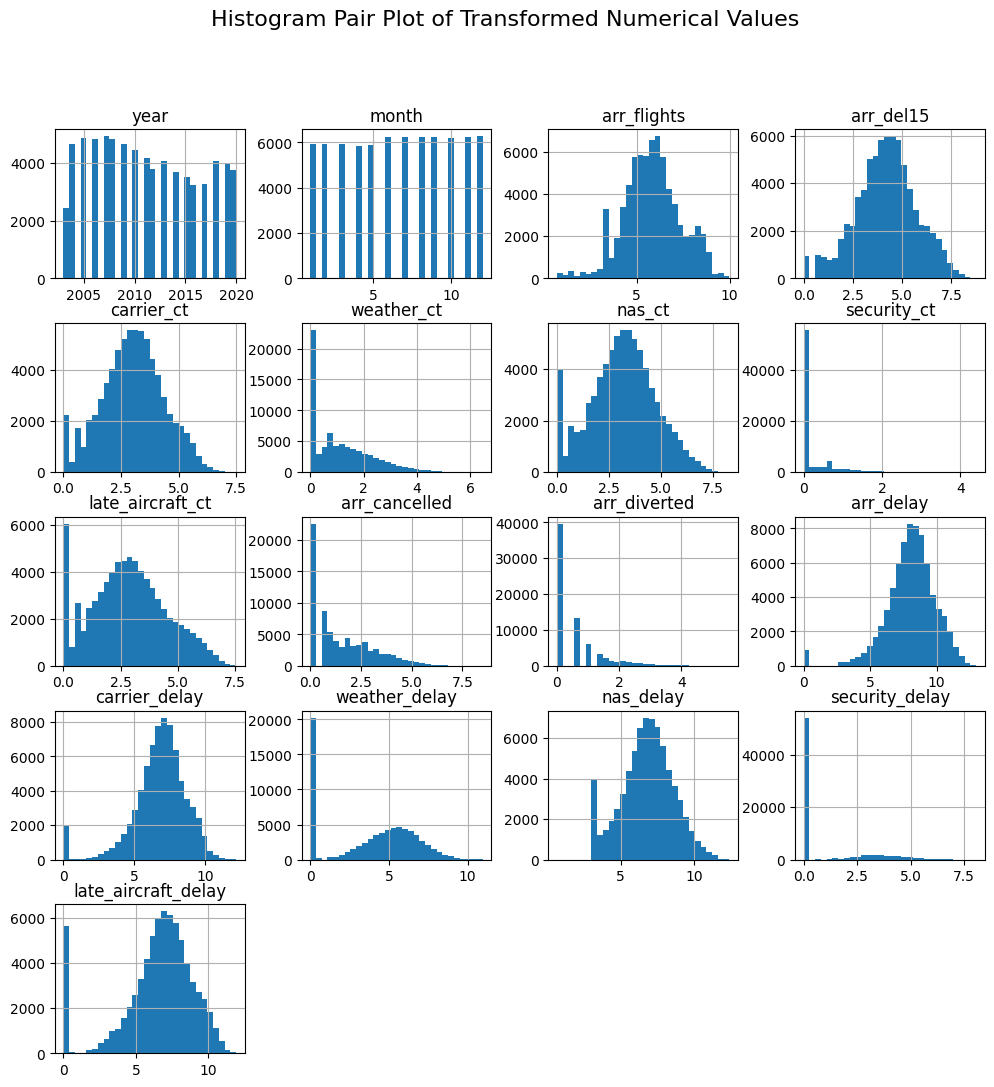

In [44]:
#Analysing numerical values and visulising outliers
transformed_df.hist(figsize=(12, 12), bins=30)
plt.suptitle("Histogram Pair Plot of Transformed Numerical Values",fontsize=16)
plt.show()

In [45]:
# Perform Kolmogorov-Smirnov test again after Yeo-Johnson transformation
skewed_cols = new_skewness[skewness > 1].index
ks_results_final = {col: kstest(transformed_df[col].dropna(), 'norm') for col in skewed_cols}

# Create DataFrame for visualization
ks_df_final = pd.DataFrame(ks_results_final).T.reset_index()
ks_df_final.columns = ["Column", "KS Statistic", "P-value"]
print(ks_df_final)


                 Column  KS Statistic  P-value
0           arr_flights      0.975854      0.0
1             arr_del15      0.903123      0.0
2            carrier_ct      0.801697      0.0
3            weather_ct      0.500000      0.0
4                nas_ct      0.786960      0.0
5           security_ct      0.500000      0.0
6      late_aircraft_ct      0.715786      0.0
7         arr_cancelled      0.500000      0.0
8          arr_diverted      0.500000      0.0
9             arr_delay      0.984544      0.0
10        carrier_delay      0.963823      0.0
11        weather_delay      0.687345      0.0
12            nas_delay      0.998807      0.0
13       security_delay      0.500000      0.0
14  late_aircraft_delay      0.910487      0.0


* Most columns have KS values close to 1, indicating a significant difference between the empirical and reference distributions. Examples: arr_flights (0.975), arr_del15 (0.903), arr_delay (0.984), and nas_delay (0.998). 

* All P-values are all 0.0: This suggests strong statistical significance, meaning the observed distributions are significantly different from the reference distribution ie the Normal/gaussian distribution.

* Some Columns Have Lower KS Statistics (~0.5): weather_ct, arr_cancelled, arr_diverted, and security_delay have KS values around 0.5, indicating less deviation from the reference distribution.

* But applying lop transformation, we notice significantly less skewness which is evident from the Histogram plots. Moreover, when we visualise the transformed dataset descriotion, we notice the difference in the standard deviation which is much more uniform. 

So we can proceed with using statistical methods and ML methods to predict delay.

In [46]:
transformed_df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000
mean,2011.188483,6.576894,5.817643,4.192277,3.018341,1.138877,3.176454,0.206737,2.851302,1.556845,0.617567,8.057321,6.795755,3.863630,6.807671,0.924259,6.503982
std,5.081828,3.446720,1.529185,1.537688,1.341583,1.128906,1.564647,0.443390,1.658978,1.502876,0.855767,1.875273,1.906181,2.775845,1.761345,1.664679,2.549902
min,2003.000000,1.000000,0.693147,0.000000,0.000000,0.000000,-0.010050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000
25%,2007.000000,4.000000,4.828314,3.218876,2.142416,0.000000,2.169054,0.000000,1.678964,0.000000,0.000000,7.105786,5.929589,0.000000,5.736572,0.000000,5.513429
50%,2011.000000,7.000000,5.805135,4.234107,3.041184,0.875469,3.214868,0.000000,2.818995,1.386294,0.000000,8.183956,6.985642,4.521789,6.880384,0.000000,6.905753
75%,2016.000000,10.000000,6.766192,5.170484,3.900355,1.856298,4.205588,0.086178,3.957665,2.564949,1.098612,9.203618,7.950855,6.054439,7.972811,1.609438,8.140898
max,2020.000000,12.000000,9.997797,8.760610,7.491685,6.465429,8.316855,4.401339,7.542463,8.507547,5.549076,12.980081,12.190680,10.963151,12.381961,8.069342,11.906197


We still somehow, observe negative minimum value in "nas_ct". So we fix the code using following code:

In [47]:
# Replace negative values in nas_ct  with 0
flight_data_df["nas_ct"] = flight_data_df["nas_ct"].apply(lambda x: max(x, 0))

Now, our dataset is completely ready for further analysis.

## Key Takeaways from Flight Delay Data Analysis:

1. **Trends in Flight Delays**:

* Delays increased from 2002-2019, peaking before a sharp drop in 2020 due to COVID-19.
* Arrival delays are the most frequent, driven by late aircraft and NAS (air traffic control) delays.
* Peak delays occur in summer (June-July) and winter (December) due to high demand.

2. **Airports & Airlines with High Delays**:

* Major hubs (ATL, ORD, DFW, MSP) experience the most delays due to congestion.
* Chicago O’Hare (ORD) faces consistent delays across multiple airlines.
* Delta (DL), American (AA), and Southwest (WN) have the highest flight volumes and delays.

3. **Delay Causes & Correlations**:

* Late aircraft delays cause a ripple effect across flights.
* Carrier-related and NAS delays significantly impact total delays.
*  Weather delays are seasonal but not the primary cause.
* Cancellations are more common in winter, while diversions remain rare.

4. **Recommendations**:

* Optimize turnaround times to reduce cascading delays.
* Improve air traffic management at major hubs like ORD and ATL.
* Adjust scheduling during peak months to ease congestion.
* Enhance weather contingency plans for winter operations.
* Use predictive analytics to anticipate and mitigate delays.

### Possible Business Questions:


1. Which airlines and airports experience the highest delays?
    
    Hubs like ATL, ORD, and DFW face the most delays due to congestion. Delta (DL), American (AA), and Southwest (WN) have the highest flight delays.

2. What are the biggest causes of delays?
    
    Late aircraft delays (delayed incoming flights affecting subsequent flights). Carrier-related issues (maintenance, staffing, and scheduling), NAS (air traffic congestion and control restrictions).

3. How do delays vary by season or year?
   
   Delays peak in summer (June-July) and winter (December) due to high demand. Flight delays increased significantly from 2002 to 2019, before a sharp drop in 2020 due to COVID-19 travel restrictions.

4. Which airlines manage delays efficiently?
    
    Some small carriers handle delays better due to simpler operations. Legacy carriers (DL, AA, UA) face more delays due to complex hub-and-spoke networks.

5. How much revenue is lost due to delays?
    
    Airlines lose millions in operational costs, passenger compensations, and missed connections. Late aircraft delays lead to further losses due to crew overtime and fuel costs.

6. What is the financial impact of late aircraft delays?
    
    Late aircraft delays cause a chain reaction of missed connections and rescheduling, increasing costs. Airlines operating with tight turnaround times (e.g., Southwest) face the highest cost impact.

7. Are compensation claims linked to delays?
    
    Long delays (over 2 hours) often lead to compensation claims, affecting airline profitability.

8. Which routes or airlines cause the most passenger dissatisfaction?
    
    ORD (Chicago O’Hare) and major hub routes experience high delays, leading to frustrated travelers. Airlines with high NAS and carrier delays receive more complaints.

9. When should passengers expect the most disruptions?
    
    Peak travel seasons (June–July, December) have the highest delays. Winter months (January, November, December) see more cancellations due to weather.

10. How can airlines minimize passenger inconvenience?
    
    Better scheduling and aircraft turnaround times can reduce delays. Offering proactive rebooking and communication improves customer experience.

11. Can we predict delays based on historical trends?
    
    Patterns show that delays are higher in congested airports and during peak travel periods. A predictive model using weather, NAS, and operational data can forecast delays.

12. How can airlines reduce cascading delays?
    
    Optimizing turnaround times and crew scheduling prevents late aircraft delays. Better NAS coordination with air traffic control minimizes congestion issues.

13. Should airports increase staffing during peak seasons?
    
    Better fleet management by increasing air traffic control efficiency, ground crew availability, and gate assignments can reduce bottlenecks.

14. How can airlines reduce NAS-related and carrier delays?
    
    Investing in technology and operational efficiency can minimize controllable delays. Strategic scheduling and dynamic rerouting can help mitigate NAS congestion effects.

### Next steps for improved aviation business and customer service.:

* Optimize turnaround times to reduce cascading delays.

* Improve air traffic management at major hubs like ORD and ATL.

* Adjust scheduling during peak months to ease congestion.

* Enhance weather contingency plans for winter operations.

* Use predictive analytics to anticipate and mitigate delays.